# AWS Billing Report 

https://d-906760626e.awsapps.com/start


In [1]:
import boto3
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns
import pandas as pd
import subprocess
from time import time, sleep
import webbrowser
from boto3.session import Session
import matplotlib.pyplot as plt


https://stackoverflow.com/questions/62311866/how-to-use-the-aws-python-sdk-while-connecting-via-sso-credentials

In [2]:
# if your sso is setup in a different region, you will
# want to include region_name=sso_region in the 
# session constructor below

def AWS_SSO_Login():
    session = Session()
    start_url = 'https://d-906760626e.awsapps.com/start'
    region = 'us-east-1' 
    sso_oidc = session.client('sso-oidc',region_name=region)
    client_creds = sso_oidc.register_client(
        clientName='myapp',
        clientType='public',
    )
    device_authorization = sso_oidc.start_device_authorization(
        clientId=client_creds['clientId'],
        clientSecret=client_creds['clientSecret'],
        startUrl=start_url,
    )
    url = device_authorization['verificationUriComplete']
    device_code = device_authorization['deviceCode']
    expires_in = device_authorization['expiresIn']
    interval = device_authorization['interval']
    webbrowser.open(url, autoraise=True)
    for n in range(1, expires_in // interval + 1):
        sleep(interval)
        try:
            token = sso_oidc.create_token(
                grantType='urn:ietf:params:oauth:grant-type:device_code',
                deviceCode=device_code,
                clientId=client_creds['clientId'],
                clientSecret=client_creds['clientSecret'],
            )
            return_code = True
            break
        except sso_oidc.exceptions.AuthorizationPendingException:
            return_code = False
            pass
    return return_code,session,token

In [3]:
def Get_AWS_Account_Keys(session, token, account_no):
    region = 'us-east-1'
    account_id = account_no
    access_token = token['accessToken']
    sso = session.client('sso',region_name=region)
    account_roles = sso.list_account_roles(
        accessToken=access_token,
        accountId=account_id,
    )
    #print(account_roles)
    roles = account_roles['roleList'] # 'roleList'
    # simplifying here for illustrative purposes
    role = roles[0]
    #-------------
    #print(role)
    #-------------
    # earlier versions of the sso api returned the 
    # role credentials directly, but now they appear
    # to be in a subkey called `roleCredentials`
    if role['roleName'] == 'MarketplaceRead':
        role['roleName'] = 'BillingReadOnly'

    role_creds = sso.get_role_credentials(
        roleName=role['roleName'],
        #roleName='ReadOnly',
        accountId=account_id,
        accessToken=access_token,
    )['roleCredentials']
    #print(role_creds)
    session = Session(
        region_name=region,
        aws_access_key_id=role_creds['accessKeyId'],
        aws_secret_access_key=role_creds['secretAccessKey'],
        aws_session_token=role_creds['sessionToken'],
    )
    #-------------
    #print(role)
    #-------------
    return role_creds

# Accounts in AWS

## Enviroment values: production, development, sandbox, share services, non-prod

In [438]:
aws_name_accounts = []
# ======== >>>  Amperwave accounts <<< =========
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------


In [4]:
aws_name_accounts = []
#-----------------------------------------------
aws_account_name = 'Entercom Communications'
aws_account = '724972922289'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes This is the MAIN Account
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------a2 prod --------------
'''
aws_account_name = 'Aardvark2-Prod A2'
aws_account = '910555647794'
aws_enviroment = 'production'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#--------------------------------Data Tean ---------------
aws_account_name = 'AdvancedAudio Data Team'
aws_account = '900072481376'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'no' # no access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------A1 -----------------
aws_account_name = 'cobradev A1'
aws_account = '094289890028'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no accdsz in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------AW ??? ----------------
aws_account_name = 'Core Dev A1 or AW'
aws_account = '110926662372'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no Access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------A1 --------------
aws_account_name = 'cobraprod A1'
aws_account = '094289890028 '
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # This account canot be accces by code
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A1----------------
aws_account_name = 'Entercom A1'
aws_account = '787242951186'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS 
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#----------------------------------A1-------------
aws_account_name = 'Entercom Production A1'
aws_account = '477779916141'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- ?? ----------------
aws_account_name = 'Metadata Dev'
aws_account = '406307397670'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------ROC-----------------
aws_account_name = 'OpsConsole-NonProd ROC'
aws_account = '659560379904'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A2----------------
aws_account_name = 'Personalization A2'
aws_account = '354704368578'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no acess to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- A2 ??? ----------------
aws_account_name = 'PubCMSDev A2'
aws_account = '643170364694'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Shared_Services'
aws_account = '477185329132'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------- ?? -------------------
aws_account_name = 'uap-sandbox'
aws_account = '372074449155'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Unity Dev'
aws_account = '077691119997'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'UserTokenSandbox'
aws_account = '967638613557'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
'''

"\naws_account_name = 'Aardvark2-Prod A2'\naws_account = '910555647794'\naws_enviroment = 'production'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#--------------------------------Data Tean ---------------\naws_account_name = 'AdvancedAudio Data Team'\naws_account = '900072481376'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'no' # no access in AWS\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave_Prod'\naws_account = '847645690781'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave-No

In [5]:
for name_account in aws_name_accounts:
    print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Active Accoutns:

In [6]:
for name_account in aws_name_accounts:
    if name_account[4] == 'yes':
        print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Potential accounts that can be deleted...

In [7]:
for name_account in aws_name_accounts:
    if name_account[4] == 'no':
        print(name_account)

# Access AWS and get the Keys

In [8]:
aws_profiles = []
return_code, session,token = AWS_SSO_Login()
if return_code:
    for name_account in aws_name_accounts:
        if name_account[4] == 'yes':
            print("Getting keys for: " + name_account[0])
            aws_account_name = name_account[0]
            aws_account = name_account[1]
            role_creds = Get_AWS_Account_Keys(session, token, aws_account)
            aws_access_key_id = role_creds['accessKeyId']
            aws_secret_access_key = role_creds['secretAccessKey']
            aws_session_token = role_creds['sessionToken']
            aws_keys = {'name':aws_account_name, 'account': aws_account, 'key':aws_access_key_id, 'access':aws_secret_access_key, 'token':aws_session_token}
            aws_profiles.append(aws_keys)
else:
    print("Unable to Login in AWS SSO")


Getting keys for: Entercom Communications


In [9]:
for profiles in aws_profiles:
    print(profiles['name'])

Entercom Communications


# Get the correct Dates

In [10]:
# Find the start and end dates for last month
today = date.today()
first_day_of_previous_month = (today.replace(day=1) - relativedelta(months=1)).replace(day=1)
last_day_of_previous_month = today.replace(day=1) - relativedelta(days=1)
reportMonth = (today - relativedelta(months=1)).strftime("%b").upper()
reportYear= str(today.year)
#month_name = today.strftime("%b")

In [11]:
reportStart = first_day_of_previous_month.strftime('%Y-%m-%d')
reportEnd = last_day_of_previous_month.strftime('%Y-%m-%d')

## If you waant to set it up Manually:

In [145]:
reportStart = '2025-03-01'
reportEnd = '2025-04-01'
reportYear = '2025'
reportMonth = 'MAR'

In [146]:
print("From: " + reportStart + " To: " + reportEnd)
print('Month: ' + reportMonth)
print('Year: ' + reportYear)

From: 2025-03-01 To: 2025-04-01
Month: MAR
Year: 2025


# Playing wiht Tags.....

In [870]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    #response_tag1 = cost_explorer_client.get_tags(Arn='arn:aws:sts::724972922289:assumed-role/AWSBillingReadOnlyAccess_9298a8a5bf35e9c4/jorge.rodriguez@audacy.com')

    response_tag = cost_explorer_client.get_tags(
        SearchString='',
        TimePeriod=time_period, 
        TagKey='Dev'
        #SortBy=[
        #{
        #    'Key': 'NET_UNBLENDED_COST',
        #    'SortOrder': 'ASCENDING'
        #},]
    )
    
    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount)

            })

df = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [871]:
response_tag['Tags']

['']

In [874]:
response.keys()

dict_keys(['GroupDefinitions', 'ResultsByTime', 'DimensionValueAttributes', 'ResponseMetadata'])

# Getting the Billing Information

In [147]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount),
                'Enviroment': group['Keys'][1]
            })

df = pd.DataFrame(data)
#df_AW = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [15]:
#df_both = pd.concat([df,df_AW], axis=0, ignore_index=True)

In [148]:
df['Enviroment'].unique()

array(['Environment$', 'Environment$prod', 'Environment$nonprod',
       'Environment$Production', 'Environment$dev',
       'Environment$loadtest', 'Environment$sandbox',
       'Environment$shared', 'Environment$stg', 'Environment$prd',
       'Environment$common', 'Environment$global', 'Environment$PSFalcon',
       'Environment$management', 'Environment$Dev', 'Environment$test',
       'Environment$Common', 'Environment$Sandbox', 'Environment$POC',
       'Environment$qa'], dtype=object)

In [149]:
df.shape

(175, 7)

In [150]:
df.sample(10)

,Month,Year,Name,Account,Service,Cost,Enviroment
82,MAR,2025,Entercom Communications,724972922289,Amazon Elastic Compute Cloud - Compute,4596.020304,Environment$prod
97,MAR,2025,Entercom Communications,724972922289,Amazon GuardDuty,354.834180,Environment$
44,MAR,2025,Entercom Communications,724972922289,AWS WAF,51.108166,Environment$prod
125,MAR,2025,Entercom Communications,724972922289,Amazon Route 53,0.101045,Environment$Dev
150,MAR,2025,Entercom Communications,724972922289,Amazon Simple Storage Service,0.002457,Environment$Production
16,MAR,2025,Entercom Communications,724972922289,AWS Global Accelerator,2.502759,Environment$nonprod
110,MAR,2025,Entercom Communications,724972922289,Amazon Managed Workflows for Apache Airflow,198.198000,Environment$nonprod
158,MAR,2025,Entercom Communications,724972922289,Amazon Simple Storage Service,0.000063,Environment$qa
53,MAR,2025,Entercom Communications,724972922289,Amazon Cognito,15.565550,Environment$
40,MAR,2025,Entercom Communications,724972922289,AWS Systems Manager,0.010511,Environment$


# Saving the Dataframe

## Saving the File in CSV and Excell Format

In [151]:
month = "Monthly_Cost_For_"+reportMonth+"_" + reportYear
df.to_csv(month+".csv")
df.to_excel(month+".xlsx",index=False)

In [152]:
df.shape


(175, 7)

In [153]:
total_per_account_df = df.groupby(['Year','Month','Name']).agg({'Cost':'sum'})
total_per_account_df['Total in Thousands'] = total_per_account_df['Cost']/1000
total_per_account_df

,,,Cost,Total in Thousands
Year,Month,Name,,
2025,MAR,Entercom Communications,85897.538372,85.897538


In [154]:
total_per_month_df = df.groupby(['Year','Month']).agg({'Cost':'sum'})
total_per_month_df

,,Cost
Year,Month,
2025,MAR,85897.538372


# Visulization of the Accounts...

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/2313412371.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


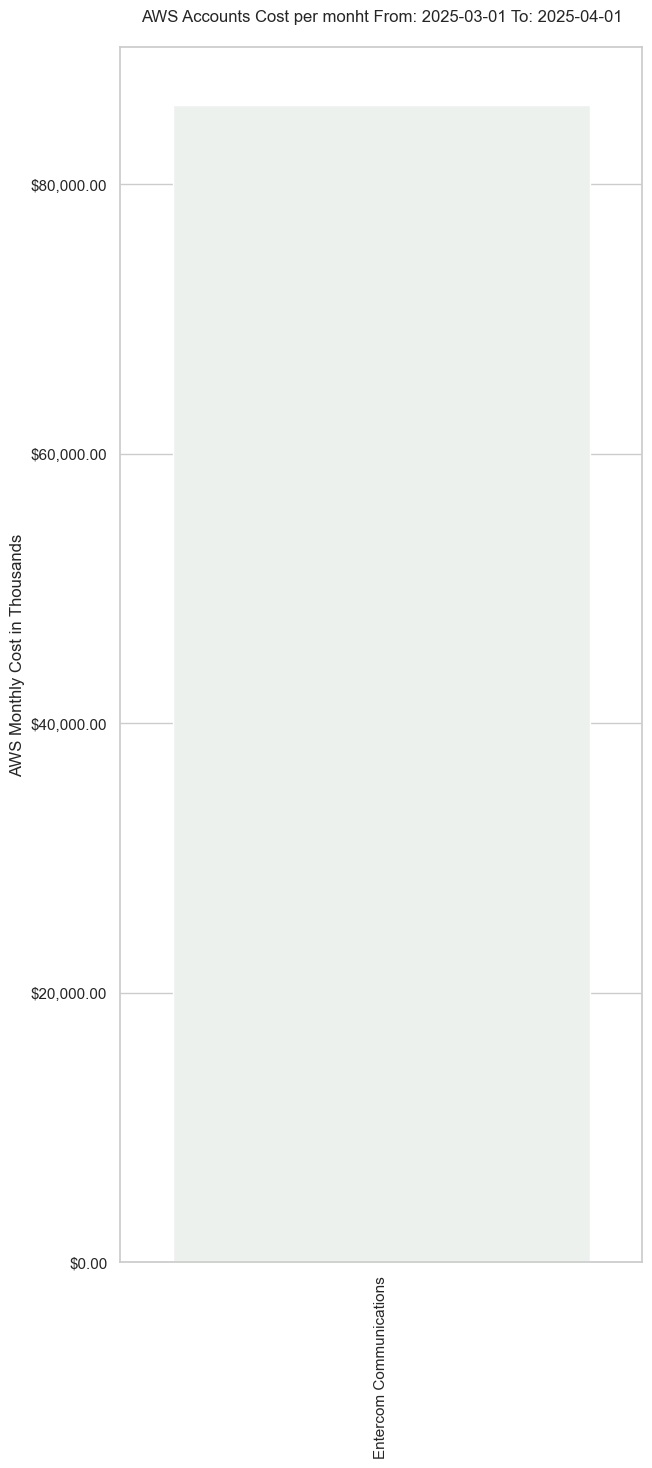

In [155]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 1
#sns.set_color_codes("pastel")
sns.barplot(y="Cost", x="Name", data=total_per_account_df,
            palette='light:g', hue='Name', legend=False)


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ylim=(0, 2500000),
ax.set(xlabel="",
       ylabel="AWS Monthly Cost in Thousands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_title("AWS Accounts Cost per monht From: " + reportStart + " To: " + reportEnd + '\n')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-03-01 To: 2025-04-01\n')

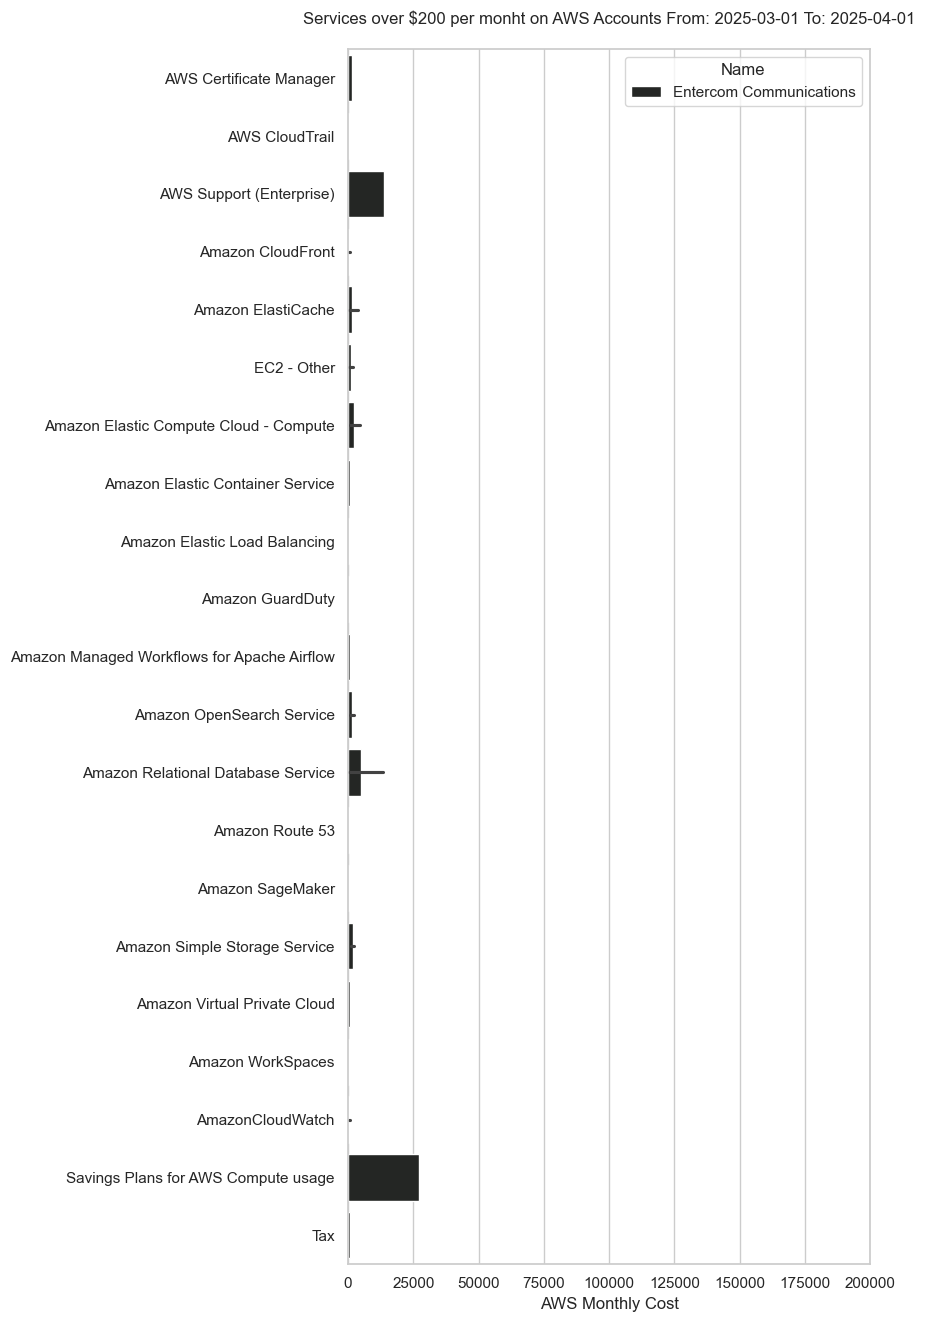

In [156]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Service", data=df[df.Cost >= monthly_cost ],
            palette='dark:g', hue='Name')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-03-01 To: 2025-04-01\n')

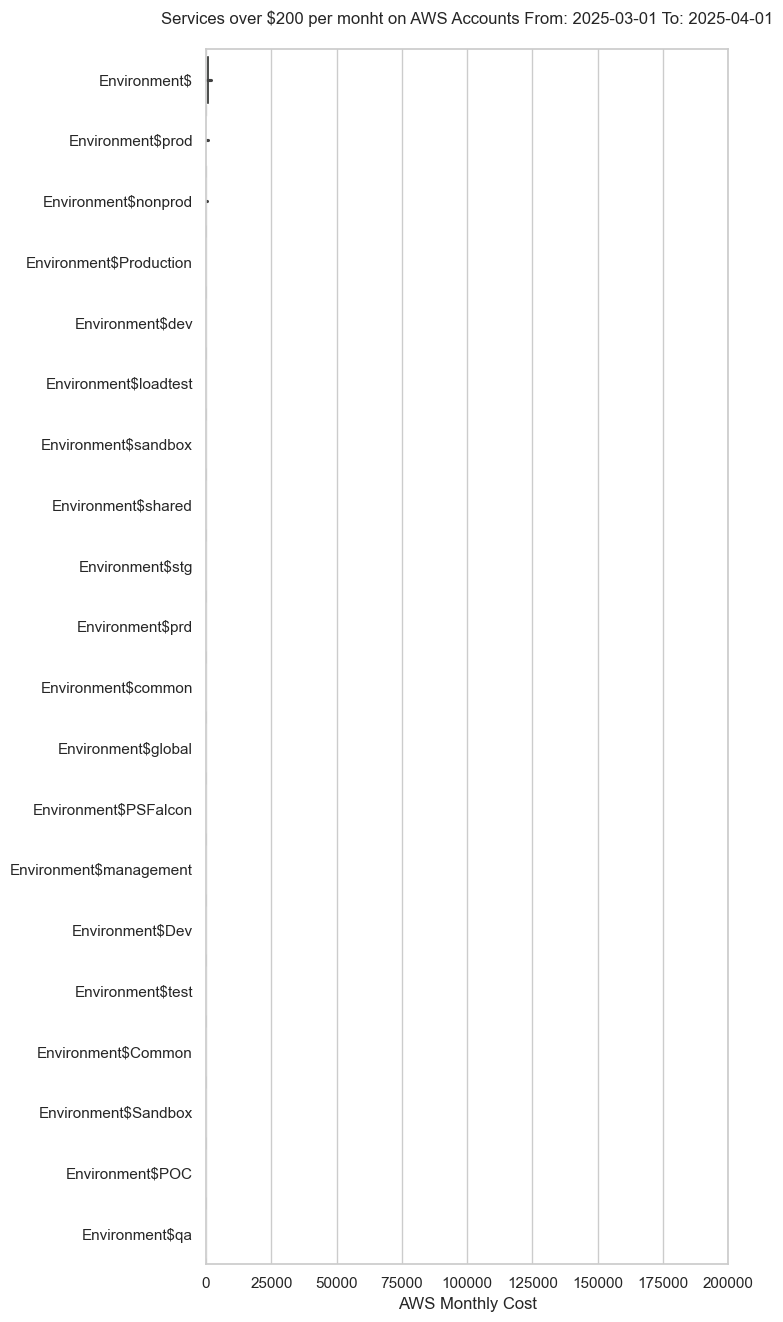

In [157]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Enviroment", data=df,
            palette='dark:g', hue='Enviroment')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

<Axes: >

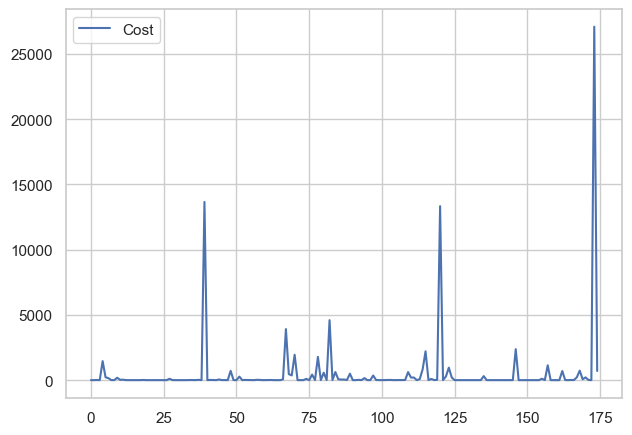

In [158]:
df.plot()

In [26]:
df[df['Cost'] > 200000]

,Month,Year,Name,Account,Service,Cost,Enviroment


In [27]:
df.iloc[200]

Month                             FEB
Year                             2025
Name          Entercom Communications
Account                  724972922289
Service              AmazonCloudWatch
Cost                         1.542938
Enviroment            Environment$dev
Name: 200, dtype: object

In [159]:
total_per_service_df = df.groupby(['Year','Service','Name']).agg(Total=('Cost','sum'))

In [160]:
total_per_service_df.head()

Total
Year Service                 Name                                
2025 AWS Amplify             Entercom Communications     0.000734
     AWS Backup              Entercom Communications    11.556519
     AWS Budgets             Entercom Communications     0.036400
     AWS Certificate Manager Entercom Communications  1456.000000
     AWS CloudTrail          Entercom Communications   221.066504

In [161]:
services_df = total_per_service_df[total_per_service_df['Total'] > 0.05000].sort_values(['Name','Total'])

In [162]:
services_df

Total
Year Service                                Name                                 
2025 Amazon Macie                           Entercom Communications      0.149604
     CloudWatch Events                      Entercom Communications      0.151326
     Amazon Glacier                         Entercom Communications      0.151517
     AWS Glue                               Entercom Communications      0.184473
     AWS End User Messaging                 Entercom Communications      0.201815
...                                                                           ...
     Amazon ElastiCache                     Entercom Communications   4729.128550
     Amazon Elastic Compute Cloud - Compute Entercom Communications   6963.663861
     AWS Support (Enterprise)               Entercom Communications  13650.000000
     Amazon Relational Database Service     Entercom Communications  14565.196659
     Savings Plans for AWS Compute usage    Entercom Communications  27081.600000

[63 rows x 1 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/1883216754.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


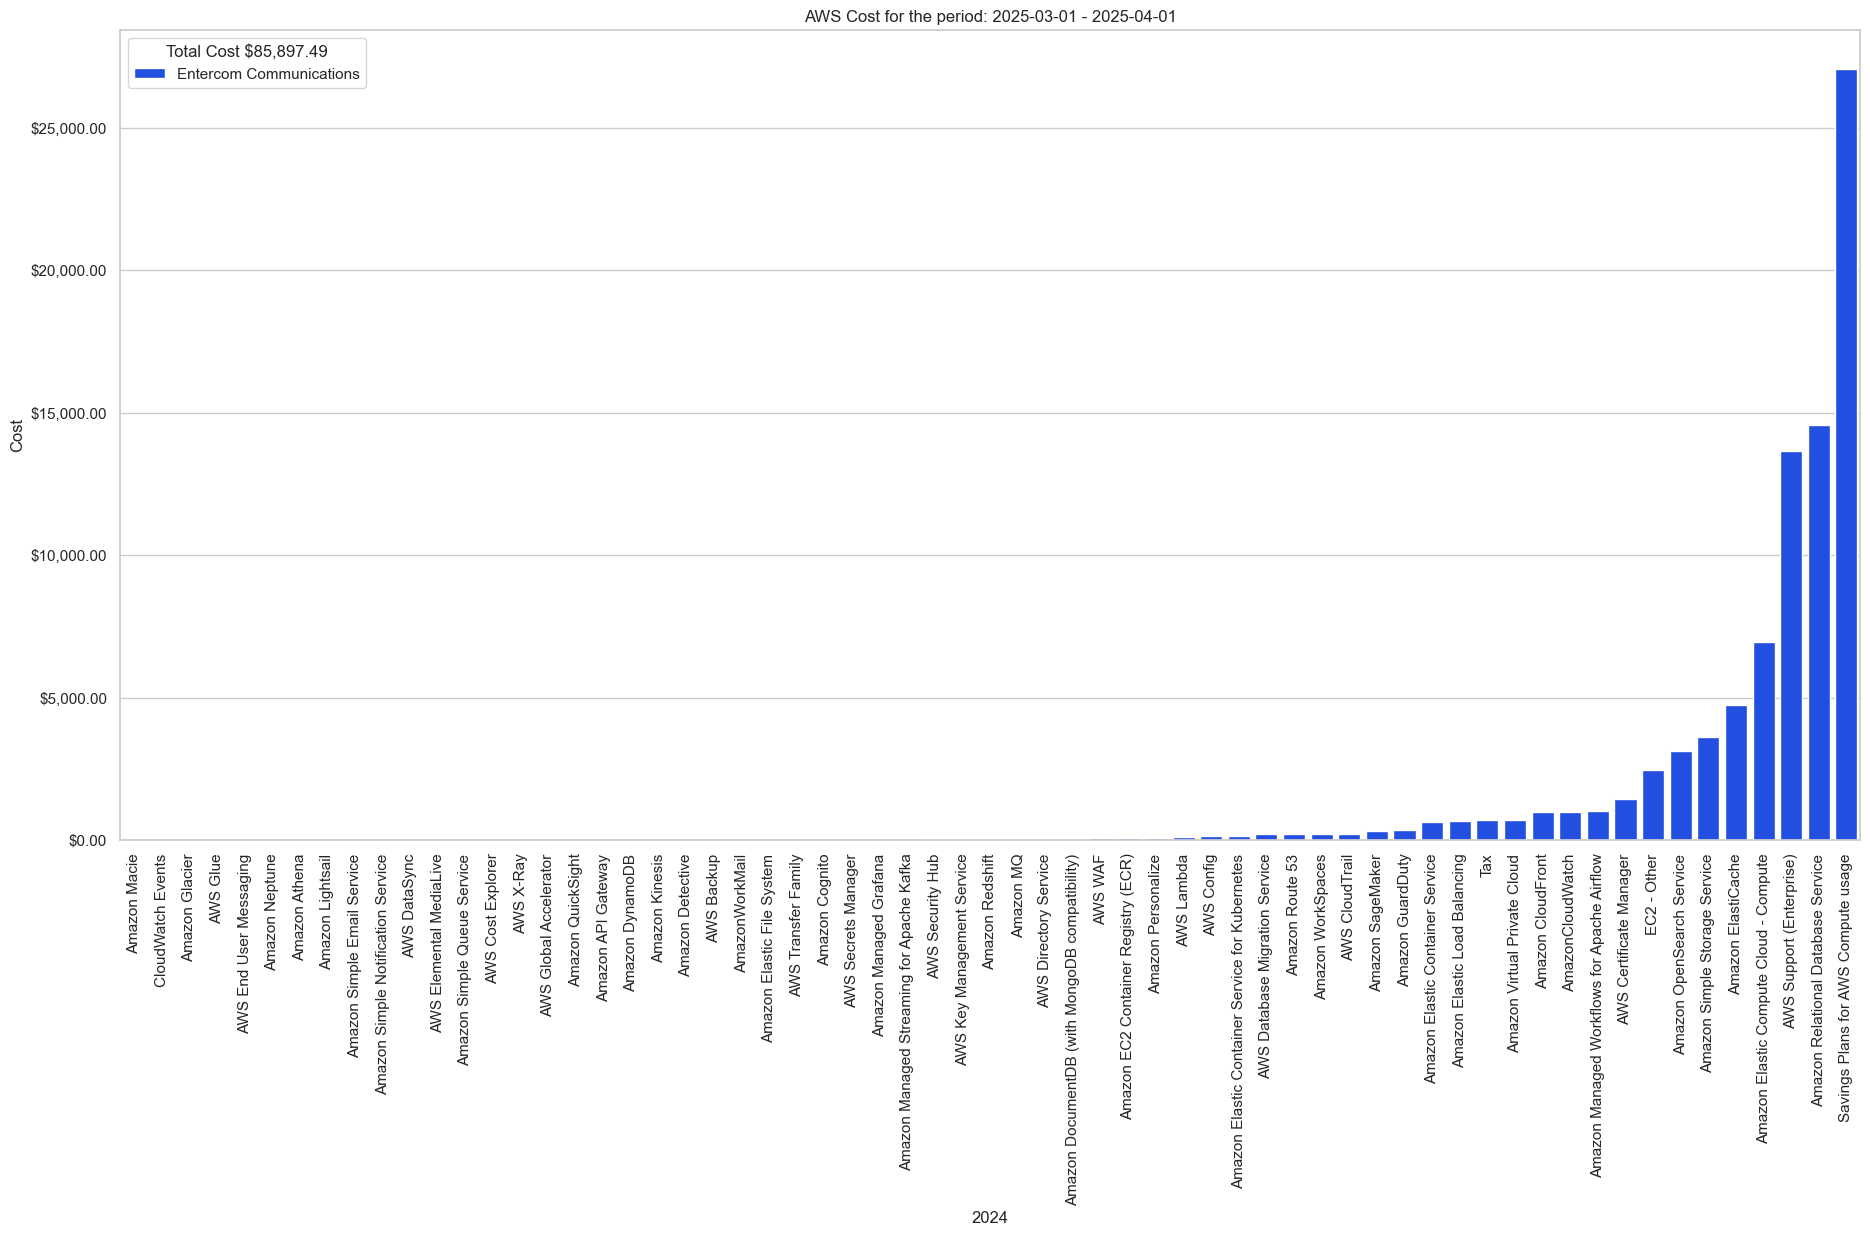

In [163]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Name', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("2024")
ax.set_ylabel("Cost")
ax.set_title("AWS Cost for the period: "+ reportStart+" - " + reportEnd)
t = services_df['Total'].sum()
#t = services_df['Total'].sum() - (2 * df_AW['Cost'].sum())
#t_aw = df_AW['Cost'].sum()
# ax.legend(title="Total Cost without AW $"+str("{:,.2f}".format(t))+" --- AW Cost $ "+str("{:,.2f}".format(t_aw)))
ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $100,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [164]:
total_cost_services = services_df['Total'].sum()
top_5_services_cost = services_df.iloc[-5:]['Total'].sum()
lefover_services_cost = total_cost_services - top_5_services_cost


In [165]:
data = {'labels': ['Top 5 Services Cost', 'All Rest Services Cost'],
        'values': [top_5_services_cost, lefover_services_cost]}
df_pie = pd.DataFrame(data)

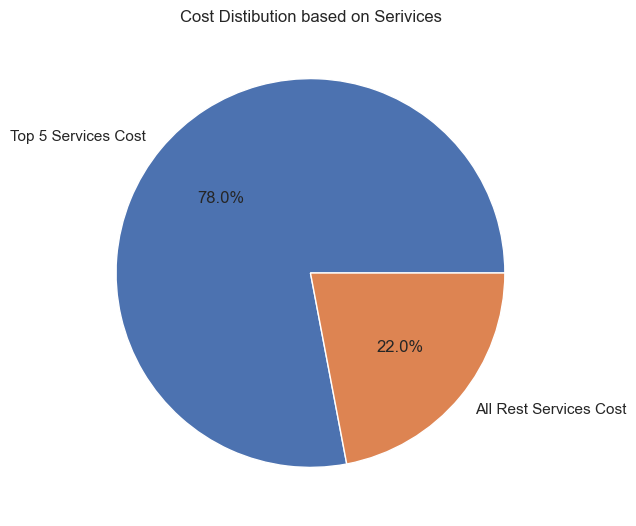

In [166]:

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_pie['values'], labels=df_pie['labels'], autopct='%1.1f%%')
plt.title('Cost Distibution based on Serivices')
plt.show()


# Reading all CSV Files:

In [167]:
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('Monthly_Cost_For_*.csv')

# Create an empty list to store the DataFrames
dfs = [] 

# Loop over each CSV file and read it into a DataFrame
for file in csv_files:
    print("reading File: " + file)
    df = pd.read_csv(file) 
    dfs.append(df) 

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True) 
month_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_number = [1,2,3,4,5,6,7,8,9,10,11,12]
kafka_new ='Apache Kafka® & Apache Flink® on Confluent Cloud™ - Annual Commits'
kafka_old ='Apache Kafka® on Confluent Cloud™ - Annual Commits'
combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)
combined_df['Service'] = combined_df['Service'].replace('Datadog Pro','Datadog')
combined_df['Service'] = combined_df['Service'].replace(kafka_old,kafka_new)

# Print the combined DataFrame
combined_df.sample(30)

reading File: Monthly_Cost_For_OCT_2022.csv
reading File: Monthly_Cost_For_OCT_2023.csv
reading File: Monthly_Cost_For_OCT_2021.csv
reading File: Monthly_Cost_For_FEB_2024.csv
reading File: Monthly_Cost_For_JUN_2023.csv
reading File: Monthly_Cost_For_JUN_2022.csv
reading File: Monthly_Cost_For_FEB_2025.csv
reading File: Monthly_Cost_For_OCT_2024.csv
reading File: Monthly_Cost_For_FEB_2022.csv
reading File: Monthly_Cost_For_JUN_2024.csv
reading File: Monthly_Cost_For_FEB_2023.csv
reading File: Monthly_Cost_For_NOV_2022.csv
reading File: Monthly_Cost_For_NOV_2023.csv
reading File: Monthly_Cost_For_NOV_2021.csv
reading File: Monthly_Cost_For_AUG_2024.csv
reading File: Monthly_Cost_For_JAN_2022.csv
reading File: Monthly_Cost_For_JAN_2023.csv
reading File: Monthly_Cost_For_DEC_2024.csv
reading File: Monthly_Cost_For_NOV_2024.csv
reading File: Monthly_Cost_For_DEC_2021.csv
reading File: Monthly_Cost_For_AUG_2022.csv
reading File: Monthly_Cost_For_DEC_2023.csv
reading File: Monthly_Cost_For_J

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/214107491.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)


,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
3458,21,JAN,2023,Entercom Communications,724972922289,AWS Key Management Service,11.852458,NaN,1
2123,192,JUN,2024,Entercom Communications,724972922289,Amazon Virtual Private Cloud,6.552000,NaN,6
924,68,JUN,2023,Entercom Communications,724972922289,Amazon ElastiCache,6576.101050,NaN,6
6936,77,MAR,2022,Entercom Communications,724972922289,EC2 - Other,0.724000,NaN,3
4537,5,DEC,2023,Entercom Communications,724972922289,AWS CloudShell,0.000002,NaN,12
520,92,OCT,2021,Entercom Communications,724972922289,Amazon Elastic Compute Cloud - Compute,258.554880,NaN,10
7824,82,SEP,2023,Entercom Communications,724972922289,EC2 - Other,0.002583,NaN,9
2285,141,FEB,2023,Entercom Communications,724972922289,Amazon OpenSearch Service,1086.889185,NaN,2
5810,195,MAR,2024,Entercom Communications,724972922289,Amazon WorkSpaces,328.387703,NaN,3
9043,194,SEP,2022,Entercom Communications,724972922289,Amazon SimpleDB,0.000024,NaN,9


In [168]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
total_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg(Total_cost_per_Month=('Cost','sum')).sort_values(by='Month No')
total_per_month_df['Cost_in_Millions'] = total_per_month_df['Total_cost_per_Month']/1000
total_per_month_df 

,,,Total_cost_per_Month,Cost_in_Millions
Year,Month,Month No,,
2022,JAN,1,4.806844e+05,480.684441
2023,JAN,1,6.575551e+05,657.555146
2024,JAN,1,8.108048e+05,810.804834
2025,JAN,1,9.560546e+05,956.054633
2023,FEB,2,6.126164e+05,612.616381
2024,FEB,2,6.158228e+05,615.822808
2025,FEB,2,5.635965e+05,563.596494
2022,FEB,2,4.958688e+05,495.868775
2024,MAR,3,9.899129e+05,989.912922


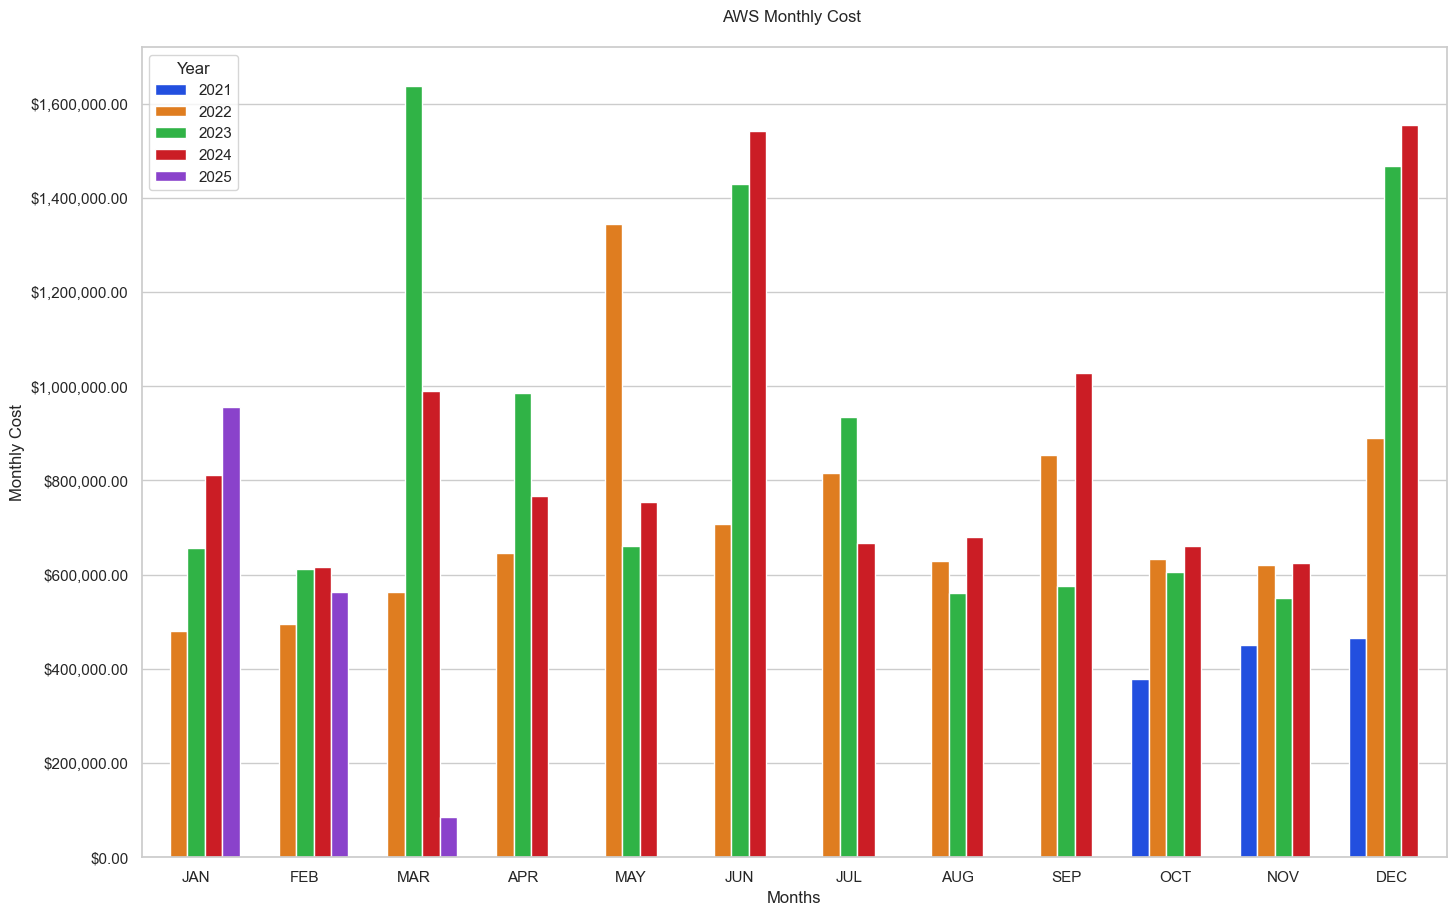

In [169]:

# Initialize the matplotlib figure
#sns.color_palette("viridis", as_cmap=True)
sns.color_palette("bright")
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Month", y="Total_cost_per_Month", data=total_per_month_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cost")
ax.set_title("AWS Monthly Cost \n")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Monthly Cost")


#sns.despine(left=True, bottom=True)

In [170]:
df_c = combined_df.copy()
#df = combined_df[combined_df['Month No'] == 6]
#df = combined_df[combined_df['Year'] == 2024]

In [171]:
df_c.shape

(9071, 9)

In [172]:
df_c[df_c['Service'] == 'Datadog Pro']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No


In [173]:
df_c[df_c['Service'] == 'Datadog']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
1062,206,JUN,2023,Entercom Communications,724972922289,Datadog,796054.59,NaN,6
2137,206,JUN,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,6
3868,210,DEC,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,12
4738,206,DEC,2023,Entercom Communications,724972922289,Datadog,560894.70,NaN,12
5391,219,DEC,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,12
7736,214,MAR,2023,Entercom Communications,724972922289,Datadog,235159.90,NaN,3
9063,214,SEP,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,9


In [174]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
#total_per_service_df = combined_df[combined_df['Month No'] == 6]
start_year = 2024
total_per_service_df = df_c[df_c['Year'] >= start_year ].groupby(['Year','Service']).agg(Total=('Cost','sum'))


In [175]:
total_per_service_df.head()

Total
Year Service                              
2024 AWS Amplify                  0.013708
     AWS Backup                1687.165501
     AWS Budgets                  3.219950
     AWS Certificate Manager  17456.000000
     AWS CloudFormation           0.000000

In [176]:
anual_cost = 10000
services_df = total_per_service_df[total_per_service_df['Total'] > anual_cost]


In [177]:
services_df

Total
Year Service                                                         
2024 AWS Certificate Manager                             1.745600e+04
     AWS CloudTrail                                      1.133030e+05
     AWS Config                                          3.452986e+04
     AWS Lambda                                          2.819787e+04
     AWS Support (Enterprise)                            5.729698e+05
     AWS WAF                                             1.039288e+04
     Amazon CloudFront                                   2.166744e+05
     Amazon ElastiCache                                  3.073299e+05
     Amazon Elastic Compute Cloud - Compute              1.137461e+06
     Amazon Elastic Container Service                    1.287271e+05
     Amazon Elastic Container Service for Kubernetes     5.027647e+04
     Amazon Elastic File System                          2.190191e+04
     Amazon Elastic Load Balancing                       1.294244e+05
     Amazon GuardDuty                                    5.716503e+04
     Amazon MQ                                           1.334562e+04
     Amazon Managed Workflows for Apache Airflow         1.372179e+05
     Amazon OpenSearch Service                           7.139758e+05
     Amazon Personalize                                  2.611176e+04
     Amazon Redshift                                     2.056085e+04
     Amazon Relational Database Service                  9.809715e+05
     Amazon Route 53                                     1.820145e+04
     Amazon SageMaker                                    4.705536e+04
     Amazon Simple Storage Service                       8.278626e+05
     Amazon Virtual Private Cloud                        2.293490e+05
     AmazonCloudWatch                                    2.497188e+05
     Apache Kafka® & Apache Flink® on Confluent Clou...  1.125977e+06
     CrowdStrike Falcon Endpoint Protection              3.222409e+05
     Datadog                                             9.890880e+05
     EC2 - Other                                         5.956948e+05
     Normalyze - Cloud Data Security Platform            9.999723e+04
     OCBCloudFront                                       2.720436e+04
     Red Canary Managed Detection and Response           2.272176e+05
     Savings Plans for AWS Compute usage                 6.223369e+05
     Tax                                                 2.836453e+05
     WIZ Cloud Infrastructure Security Platform          2.083334e+05
     dbt Cloud Enterprise                                3.831250e+04
2025 AWS Config                                          1.012015e+04
     AWS Support (Enterprise)                            1.068644e+05
     Amazon CloudFront                                   4.439251e+04
     Amazon ElastiCache                                  6.413695e+04
     Amazon Elastic Compute Cloud - Compute              2.185728e+05
     Amazon Elastic Container Service                    1.843465e+04
     Amazon Elastic Load Balancing                       2.215104e+04
     Amazon Managed Workflows for Apache Airflow         2.250018e+04
     Amazon OpenSearch Service                           1.051471e+05
     Amazon Relational Database Service                  2.033254e+05
     Amazon Simple Storage Service                       1.269450e+05
     Amazon Virtual Private Cloud                        2.664651e+04
     AmazonCloudWatch                                    4.032490e+04
     EC2 - Other                                         9.008680e+04
     Red Canary Managed Detection and Response           2.341440e+05
     Savings Plans for AWS Compute usage                 1.012470e+05
     Tax                                                 3.708689e+04
     Upwind Runtime-Powered Cloud Security Platform      4.800000e+04

In [178]:
combined_df[combined_df['Service'] == 'Red Canary Managed Detection and Response']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4955,210,JAN,2024,Entercom Communications,724972922289,Red Canary Managed Detection and Response,227217.6,NaN,1
5168,208,JAN,2025,Entercom Communications,724972922289,Red Canary Managed Detection and Response,234144.0,Environment$,1


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/1879410909.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


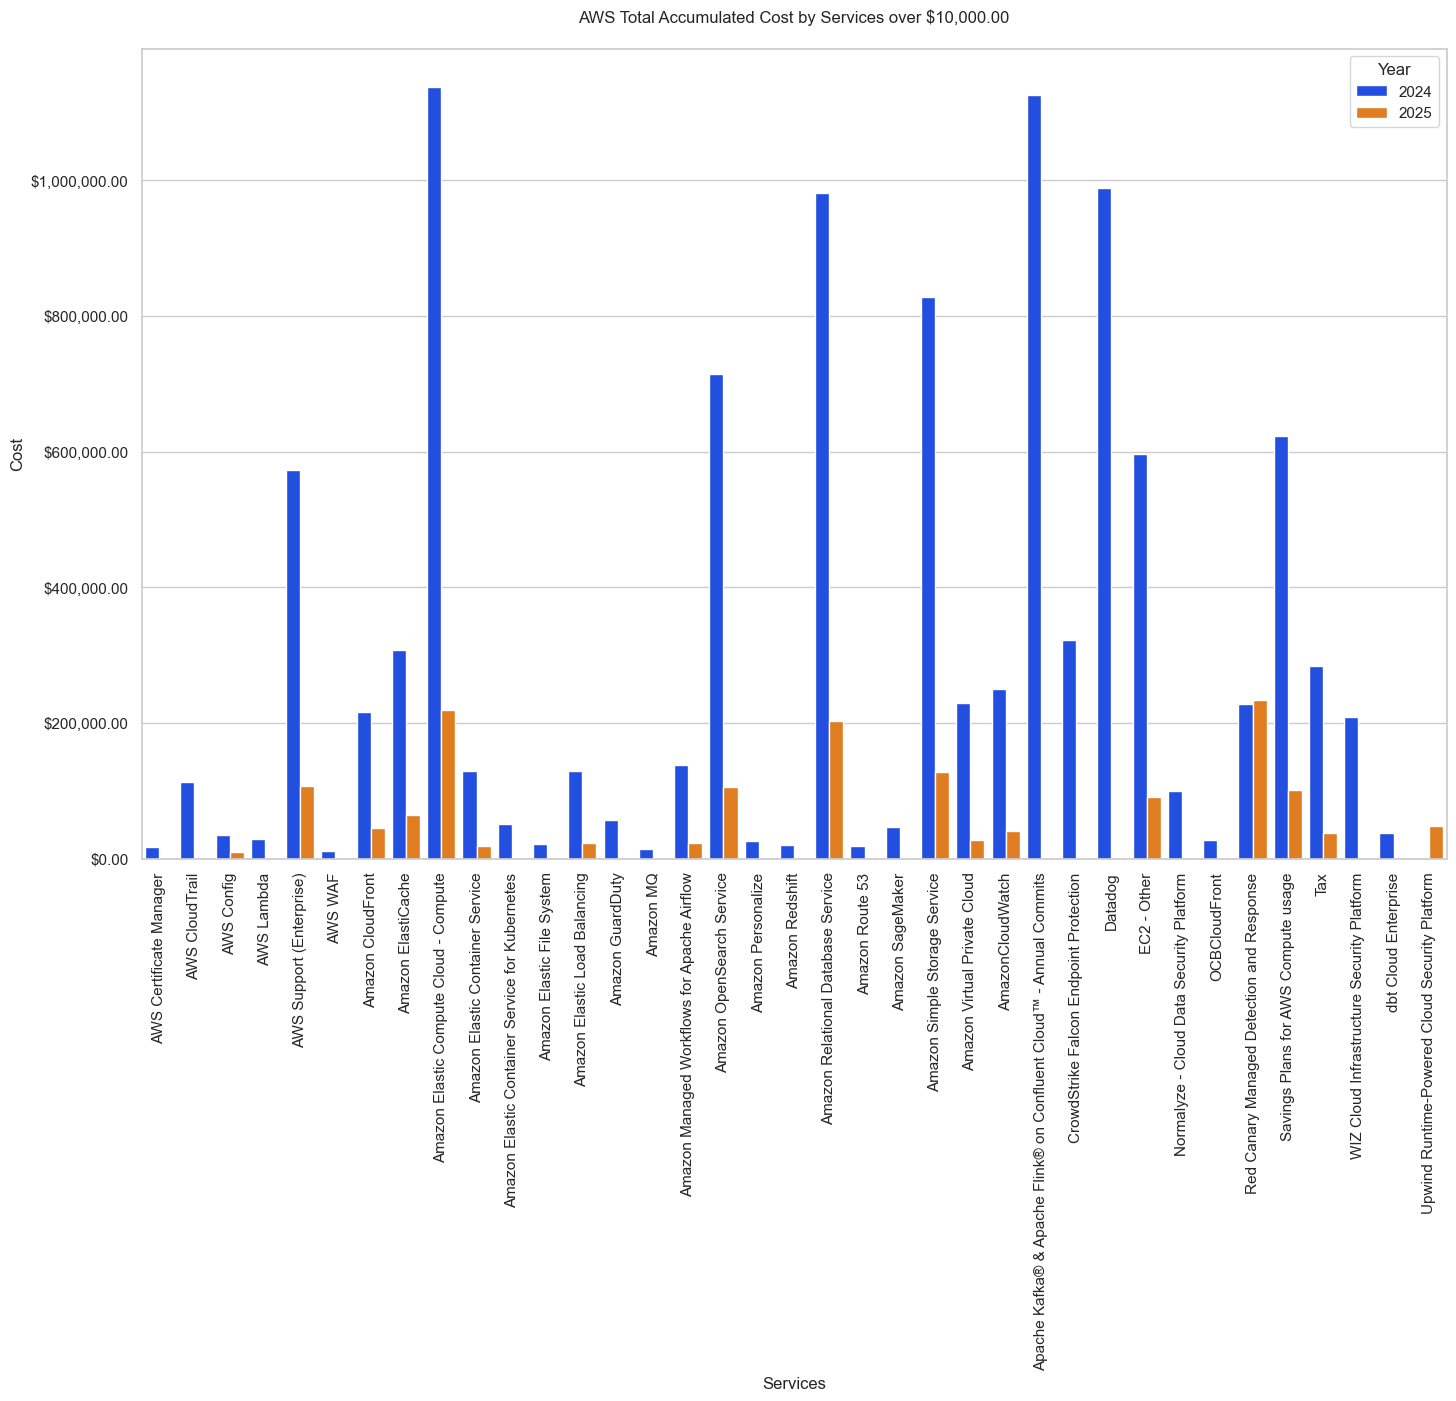

In [179]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Services")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $10,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [180]:
total_per_account_df = combined_df.groupby(['Year','Name']).agg(Total=('Cost','sum'))

In [181]:
total_per_account_df

,,Total
Year,Name,
2021,Entercom Communications,1.294031e+06
2022,Entercom Communications,8.677296e+06
2023,Entercom Communications,1.068157e+07
2024,Entercom Communications,1.069632e+07
2025,Entercom Communications,1.605549e+06


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/4280847152.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


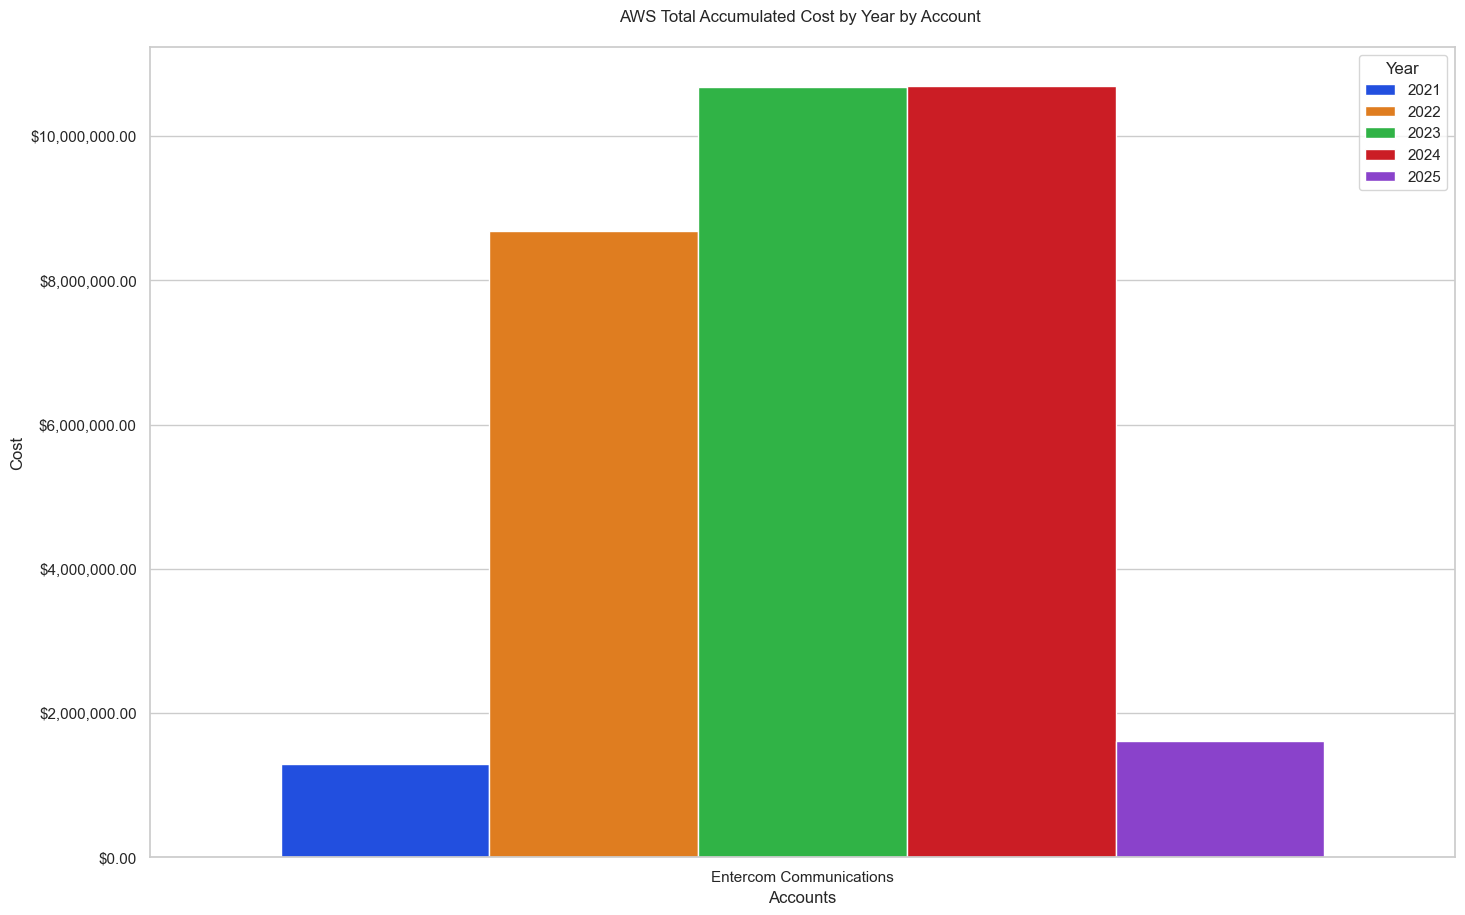

In [182]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Name", y="Total", data=total_per_account_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Accounts")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Year by Account \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost")

# Time Series Exploration 

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seasonal
%matplotlib inline

In [184]:
combined_df.sample(10)

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
3868,210,DEC,2024,Entercom Communications,724972922289,Datadog,494544.000000,NaN,12
2415,51,NOV,2022,Entercom Communications,724972922289,Amazon Cognito,7.764900,NaN,11
6085,44,MAR,2025,Entercom Communications,724972922289,AWS WAF,51.108166,Environment$prod,3
4308,2,AUG,2022,Entercom Communications,724972922289,AWS Backup,475.079562,NaN,8
8228,44,APR,2023,Entercom Communications,724972922289,AWS Transfer Family,198.933716,NaN,4
4813,68,JAN,2024,Entercom Communications,724972922289,Amazon DynamoDB,9.790754,NaN,1
1537,38,OCT,2024,Entercom Communications,724972922289,AWS Secrets Manager,105.755912,NaN,10
7965,2,MAY,2022,Entercom Communications,724972922289,AWS Backup,475.079562,NaN,5
2056,125,JUN,2024,Entercom Communications,724972922289,Amazon Location Service,0.001342,NaN,6
1566,67,OCT,2024,Entercom Communications,724972922289,Amazon DynamoDB,208.103442,NaN,10


In [54]:
df1 =combined_df.copy()
df1['Date_str'] = df1['Year'].apply(lambda x: str(x)) + "-" + df1['Month No'].apply(lambda x: str(x)) + "-01"
df1['Date'] = pd.to_datetime(df1['Date_str'])
df1 = df1.groupby(by=['Date']).agg({'Cost':sum})
df1.sort_index(inplace=True)
df1 = df1.resample('MS').sum()
df1['Cost'].sum()

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/1614081839.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = df1.groupby(by=['Date']).agg({'Cost':sum})


np.float64(32868871.612042107)

[Text(0, 0.5, 'Total Monthly Cost')]

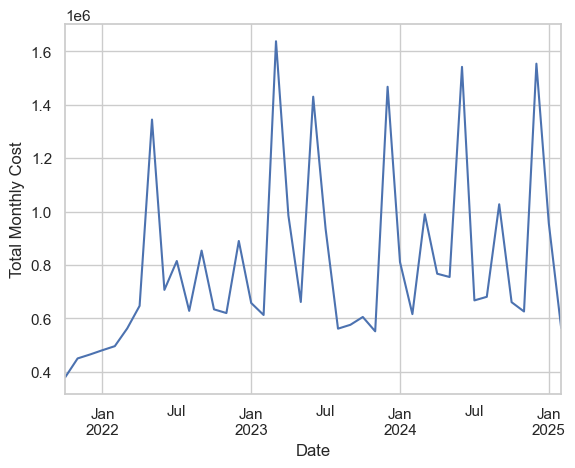

In [55]:
ax = df1['Cost'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Cost')

In [56]:
def seasonal_period_udf(counts):
    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): 
        return len(seasons)
    else: 
        return -1

In [85]:
seasonal_period_udf(df1['Cost'].values)

6

# Trend calculation
We can use functionalitis of statsmodels to get the trend value from a time series data.
Here we can use statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600) the Hodrick Prescott filter. It filter out time series
yt τt ct

In [57]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#get the values
cost_cycle, cost_trend = hpfilter(df1['Cost'], lamb=1600) # 1600 for Quarterly data, 6.25  for yerly data and 129600 for monthly data

In [87]:
cost_cycle

Date
2021-10-01   -116455.636210
2021-11-01    -74076.422384
2021-12-01    -87329.362128
2022-01-01    -99160.381594
2022-02-01   -111442.847608
2022-03-01    -71946.327424
2022-04-01    -13286.401420
2022-05-01    659782.684328
2022-06-01     -1255.878910
2022-07-01     85443.277789
2022-08-01   -121459.882796
2022-09-01     85777.446141
2022-10-01   -151555.604041
2022-11-01   -181400.864607
2022-12-01     74005.915333
2023-01-01   -171623.562476
2023-02-01   -228298.884789
2023-03-01    787010.605847
2023-04-01    125945.032583
2023-05-01   -203790.964108
2023-06-01    560529.315859
2023-07-01     62319.207519
2023-08-01   -313520.775097
2023-09-01   -300588.470370
2023-10-01   -272646.345422
2023-11-01   -327604.560426
2023-12-01    587279.113471
2024-01-01    -70138.136233
2024-02-01   -265563.620762
2024-03-01    108293.691364
2024-04-01   -114333.228189
2024-05-01   -126210.736361
2024-06-01    661729.858920
2024-07-01   -211559.330729
2024-08-01   -196243.131063
2024-09-01    1

In [58]:
type(cost_cycle)

pandas.core.series.Series

In [59]:
cost_trend

Date
2021-10-01    496327.355935
2021-11-01    524284.561471
2021-12-01    552168.709709
2022-01-01    579860.260418
2022-02-01    607184.994881
2022-03-01    633906.709496
2022-04-01    659719.628021
2022-05-01    684273.176850
2022-06-01    707208.738873
2022-07-01    728580.414719
2022-08-01    748441.968415
2022-09-01    766901.110624
2022-10-01    783990.281477
2022-11-01    799796.271448
2022-12-01    814311.984769
2023-01-01    827417.880068
2023-02-01    839041.688701
2023-03-01    849004.977819
2023-04-01    856987.798752
2023-05-01    863163.310798
2023-06-01    867784.650642
2023-07-01    870978.857224
2023-08-01    873224.549844
2023-09-01    875040.485673
2023-10-01    876750.551524
2023-11-01    878491.682524
2023-12-01    880231.096784
2024-01-01    881731.642241
2024-02-01    883123.209210
2024-03-01    884491.358751
2024-04-01    885754.589175
2024-05-01    886897.287267
2024-06-01    887829.750220
2024-07-01    888379.790784
2024-08-01    888784.086713
2024-09-01    8

In [60]:
df1['Trend'] = cost_trend

In [61]:
df1.sample(10)

,Cost,Trend
Date,,
2021-10-01,3.794357e+05,496327.355935
2022-02-01,4.958688e+05,607184.994881
2022-07-01,8.148950e+05,728580.414719
2024-07-01,6.672585e+05,888379.790784
2023-04-01,9.849516e+05,856987.798752
2023-11-01,5.514994e+05,878491.682524
2023-06-01,1.430313e+06,867784.650642
2024-11-01,6.257406e+05,889673.488456
2021-12-01,4.646831e+05,552168.709709


# Plot the trend

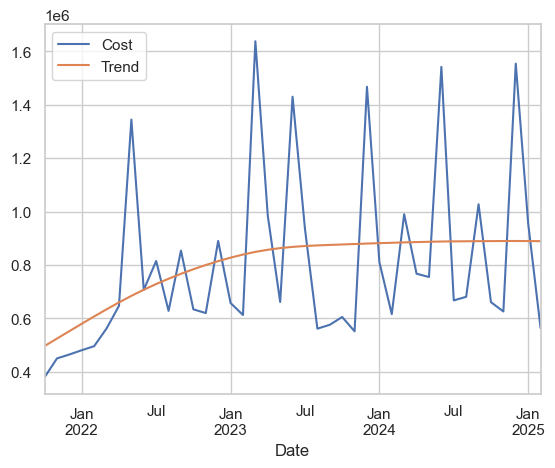

In [62]:
df1[['Cost', 'Trend']].plot().autoscale(axis='x', tight=True)

# Plot the cyclic values

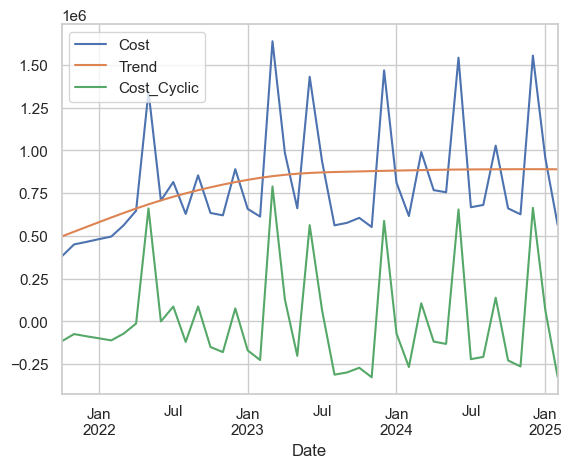

In [63]:
df1['Cost_Cyclic'] = cost_cycle
df1[['Cost', 'Trend', 'Cost_Cyclic']].plot().autoscale(axis='x', tight=True)

# Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points. That is, no matter where you take your
observations, the result should be same. A series that shows seasonality is not stationary.
How to test if a series is stationary?
A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis H0
is that the series is nonstationary, and contains
a unit root. The alternate hypothesis H1
supports stationarity. The augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests are
stationarity tests.

In [64]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

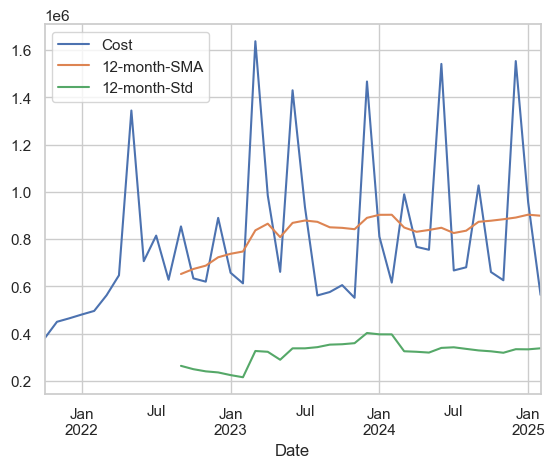

In [65]:
df1['12-month-SMA'] = df1['Cost'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Cost'].rolling(window=12).std()
df1[['Cost','12-month-SMA','12-month-Std']].plot();

In [66]:
print('Augmented Dickey-Fuller Test on Cost Data')
dftest = adfuller(df1['Cost'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Cost Data


(np.float64(-3.491695779122095),
 np.float64(0.008202942915647278),
 6,
 34,
 {'1%': np.float64(-3.639224104416853),
  '5%': np.float64(-2.9512301791166293),
  '10%': np.float64(-2.614446989619377)},
 np.float64(844.1626332525345))

In [67]:
print('Augmented Dickey-Fuller Test on Cost Data')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Cost Data
ADF test statistic      -3.491696
p-value                  0.008203
# lags used              6.000000
# observations          34.000000
critical value (1%)     -3.639224
critical value (5%)     -2.951230
critical value (10%)    -2.614447
dtype: float64


# We reject the Null Hypothesis (H0) so the Data is Stationary 

In [68]:
df1

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std
Date,,,,,
2021-10-01,3.794357e+05,496327.355935,-116891.678890,NaN,NaN
2021-11-01,4.499119e+05,524284.561471,-74372.688420,NaN,NaN
2021-12-01,4.646831e+05,552168.709709,-87485.578992,NaN,NaN
2022-01-01,4.806844e+05,579860.260418,-99175.819067,NaN,NaN
2022-02-01,4.958688e+05,607184.994881,-111316.220142,NaN,NaN
2022-03-01,5.622309e+05,633906.709496,-71675.784494,NaN,NaN
2022-04-01,6.468500e+05,659719.628021,-12869.606666,NaN,NaN
2022-05-01,1.344622e+06,684273.176850,660348.384011,NaN,NaN
2022-06-01,7.066702e+05,707208.738873,-538.564945,NaN,NaN


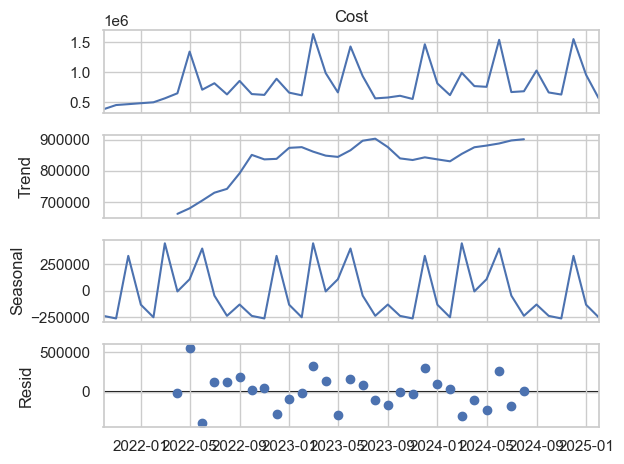

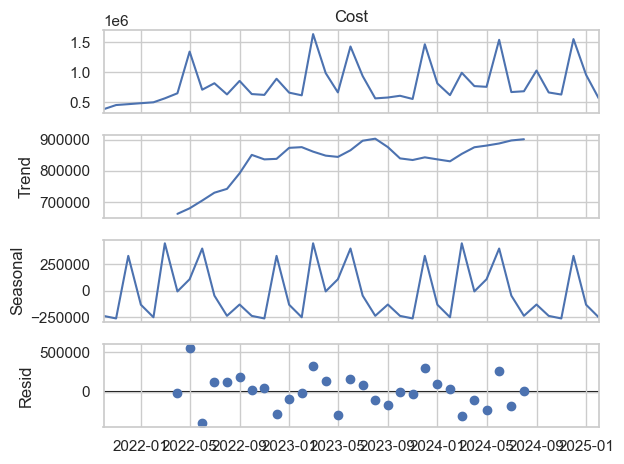

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['Cost'], model='additive')
result.plot()

# Moving average and Exponentially moving avearge

# Simple Moving Average(SMA)

In [70]:
df1['3-month-SMA'] = df1['Cost'].rolling(window=3).mean()
df1['6-month-SMA'] = df1['Cost'].rolling(window=6).mean()
df1.head(10)

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA
Date,,,,,,,
2021-10-01,3.794357e+05,496327.355935,-116891.678890,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,524284.561471,-74372.688420,NaN,NaN,NaN,NaN
2021-12-01,4.646831e+05,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN
2022-01-01,4.806844e+05,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN
2022-02-01,4.958688e+05,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN
2022-03-01,5.622309e+05,633906.709496,-71675.784494,NaN,NaN,512928.047031,472135.803651
2022-04-01,6.468500e+05,659719.628021,-12869.606666,NaN,NaN,568316.573698,516704.861036
2022-05-01,1.344622e+06,684273.176850,660348.384011,NaN,NaN,851234.169072,665823.142337
2022-06-01,7.066702e+05,707208.738873,-538.564945,NaN,NaN,899380.585381,706154.316206


<Axes: xlabel='Date'>

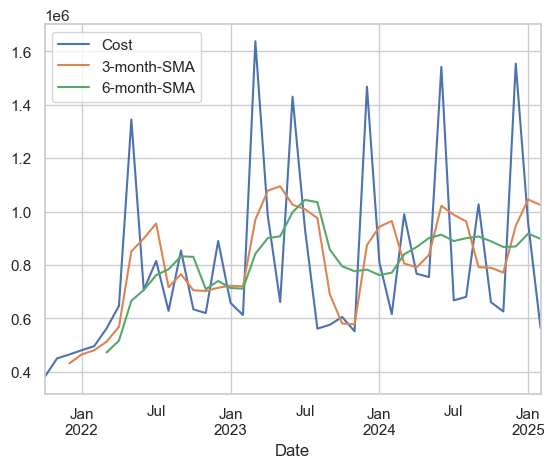

In [71]:
df1[['Cost','3-month-SMA','6-month-SMA']].plot()

# Exponentially weighted moving avearge(EWMA)
It allows to reduce the lag effect from SMA and it will put more weight on values that occured more recently. It does apply more weight on
values that occured more recently. The amount of weight applied to the most recent values will depend on actual parameters used in EWMA
and the number of periods given a window size.

In [72]:
#append ewma for span of three months
df1['3-span-EWMA'] = df1['Cost'].ewm(span=12, adjust=False).mean()

<Axes: xlabel='Date'>

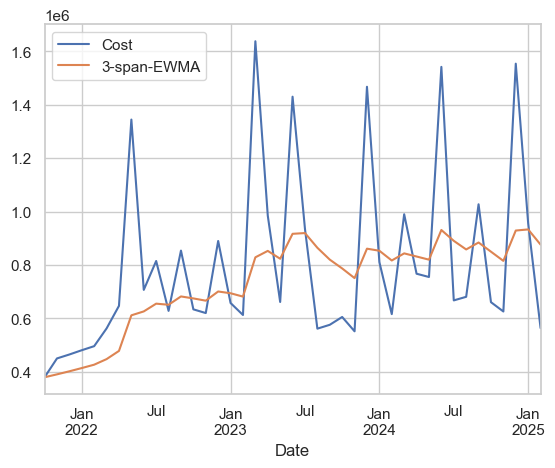

In [73]:
df1[['Cost','3-span-EWMA']].plot()

<Axes: xlabel='Date'>

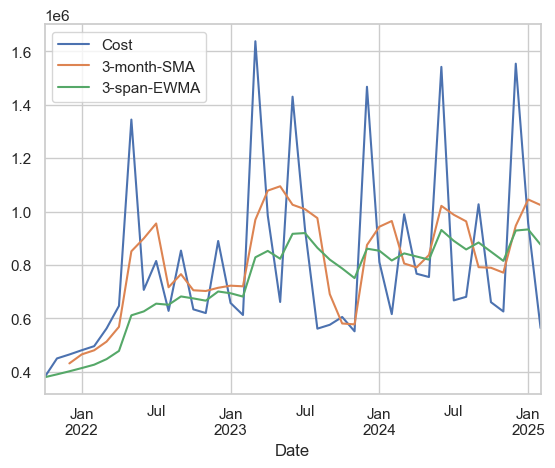

In [74]:
df1[['Cost','3-month-SMA','3-span-EWMA']].plot()

# Simple Exponential Smoothing

In [75]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 3
#define alpha
alpha = 2/(span+1)
#exponentially weightage moving average using pandas
df1['EWMA3'] = df1['Cost'].ewm(alpha=alpha, adjust=False).mean()
#Simple exponential smoothing
df1['SES3'] = SimpleExpSmoothing(df1['Cost']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df1.head()

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3
Date,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928


In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df1['DESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd
Date,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123


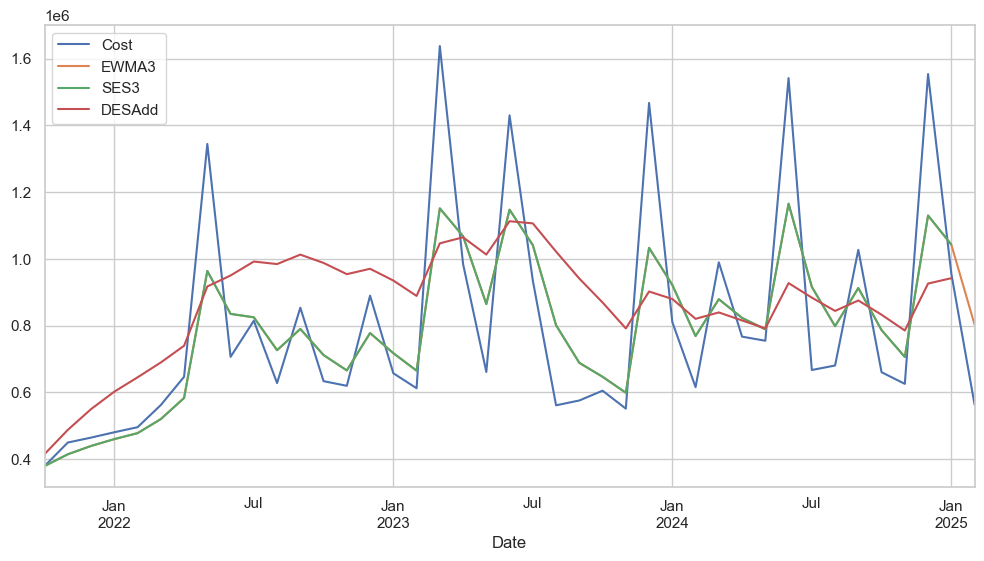

In [77]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [78]:
df1['DESMul'] = ExponentialSmoothing(df1['Cost'], trend='mul').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul
Date,,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329


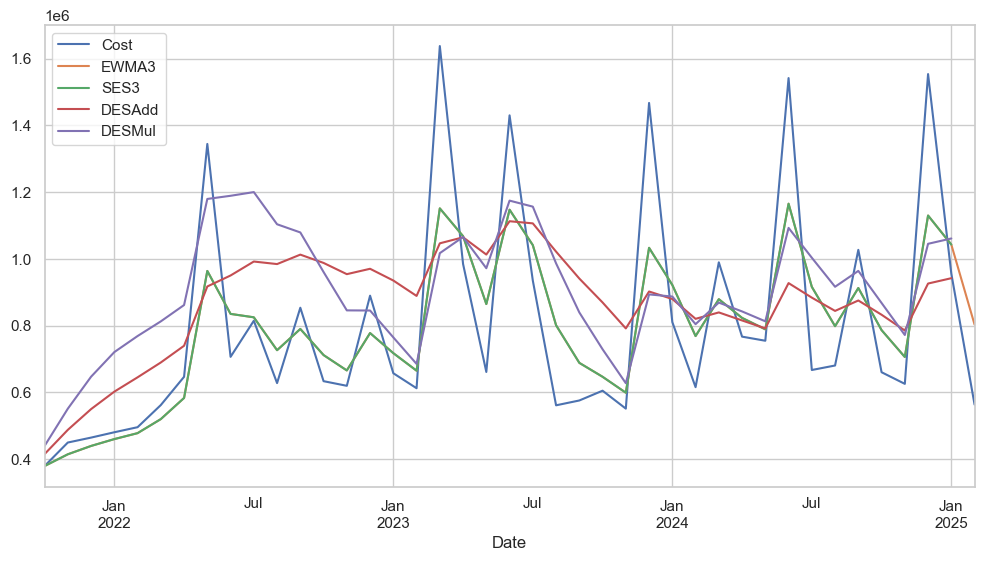

In [79]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd', 'DESMul']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [80]:
df1['TESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul,TESAdd
Date,,,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685,4.130417e+05
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545,4.096124e+05
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053,1.026767e+06
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896,5.240646e+05
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329,4.193876e+05


<Axes: xlabel='Date'>

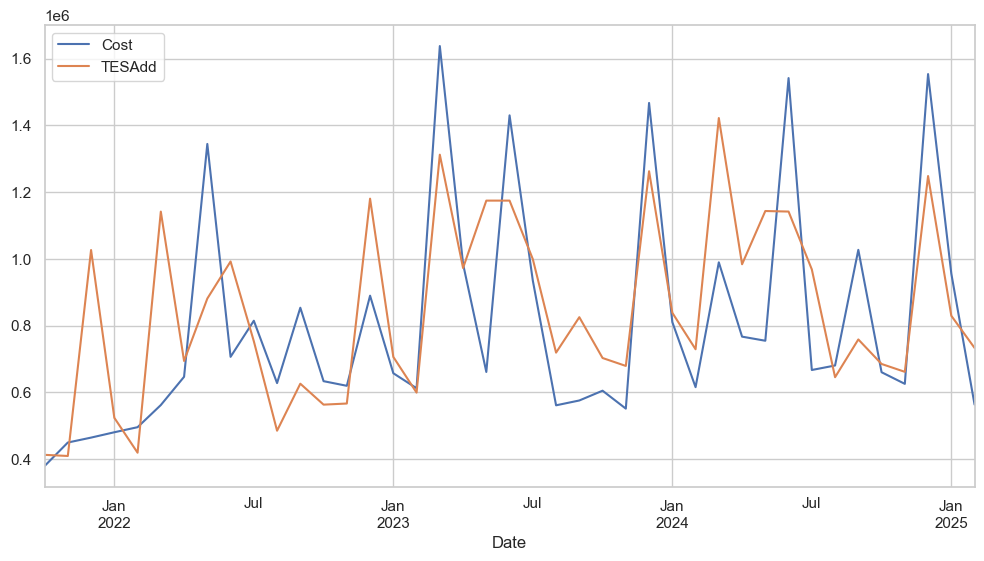

In [81]:
df1[['Cost', 'TESAdd']].plot(figsize=(12, 6))

In [82]:
df1['TESMul'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Unnamed: 0,Month,Year,Name,Account,Service,Cost
0,0,SEP,2022,Entercom Communications,724972922289,AWS Backup,2.858410e+00
1,1,SEP,2022,Entercom Communications,724972922289,AWS Backup,1.200000e-08
2,2,SEP,2022,Entercom Communications,724972922289,AWS Backup,4.750796e+02
3,3,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,1.810000e+03
4,4,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,3.620000e+02


<Axes: xlabel='Date'>

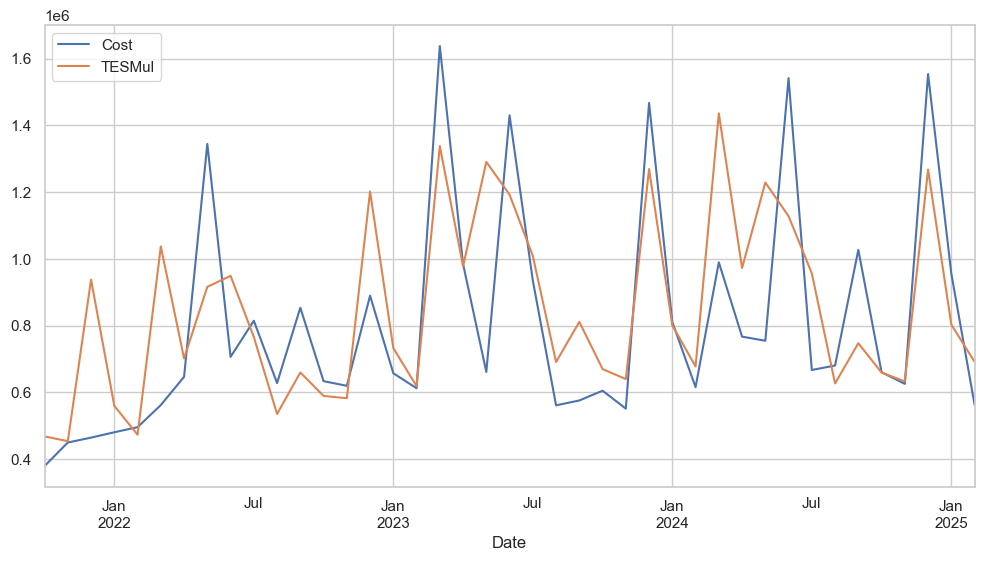

In [83]:
df1[['Cost', 'TESMul']].plot(figsize=(12, 6))

<Axes: xlabel='Date'>

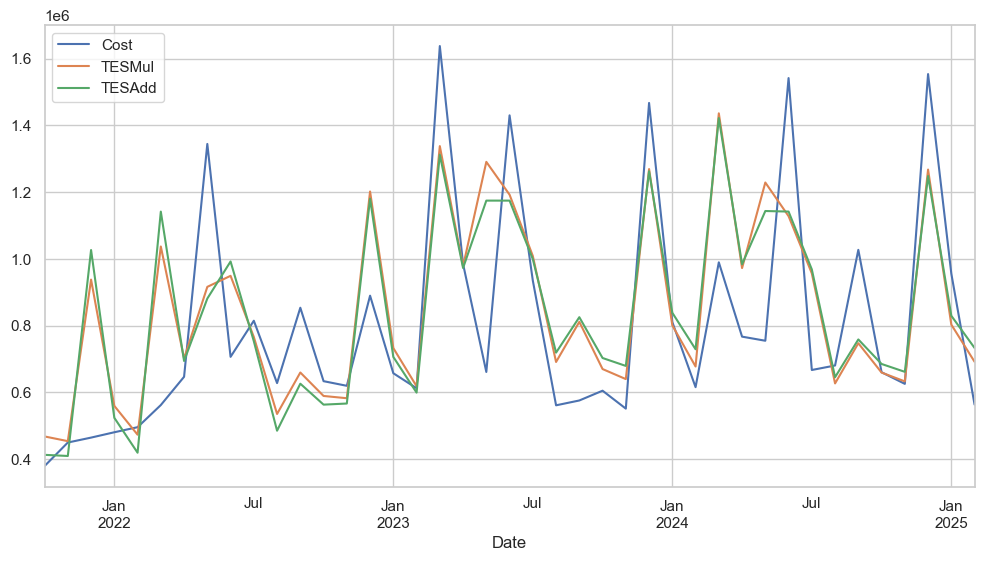

In [84]:
df1[['Cost', 'TESMul', 'TESAdd']].plot(figsize=(12, 6))

# XGBoost Machine Learning Modeling 
https://www.youtube.com/watch?v=vV12dGe_Fho

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb # brew install libomp
#from xgboost.sklearn import XGBClassifier
#from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [103]:
#df_ml =combined_df.copy()
#df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
#df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
#df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})
#df_ml.sort_index(inplace=True)
#df_ml = df_ml.resample('MS').sum()
#df_ml['Cost'].sum()

In [186]:
df_ml =combined_df.copy()
df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
df_ml.set_index('Date')
df_ml.index = pd.to_datetime(df_ml.index)
df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/1207078737.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})


In [187]:
df_ml.columns

Index(['Cost'], dtype='object')

In [176]:
# df_ml.drop(['Month','Year','Name','Account','Service','Enviroment','Month No','Date_str','Unnamed: 0'],axis=1, inplace=True)

In [177]:
# df_ml = df_ml[['Date','Cost']]

In [188]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-10-01 to 2025-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


<Axes: title={'center': 'AWS Total Cost'}, xlabel='Date'>

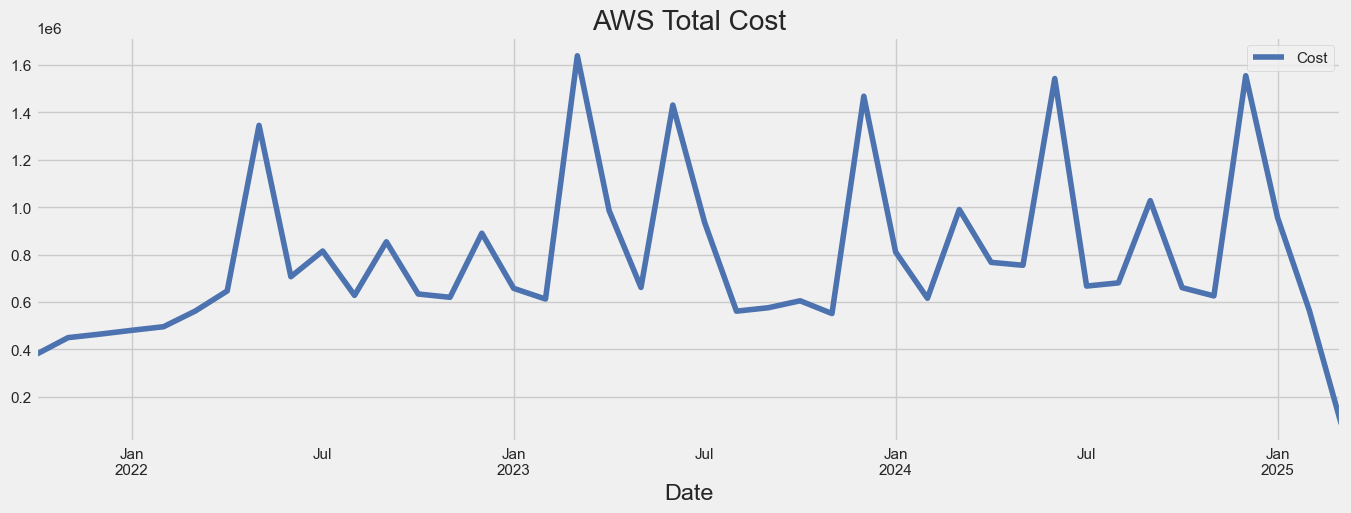

In [189]:
df_ml.plot(style='-', figsize=(15,5), color=color_pal[0], title='AWS Total Cost')

# Train, Split, Test

In [190]:
splite_date = '02-01-2024'### (M-D-Y) 12 months before the last day of a full month
last_date = '03-01-2025'
train = df_ml.loc[df_ml.index < splite_date]
test = df_ml.loc[(df_ml.index >= splite_date) & (df_ml.index < last_date)]

In [191]:
train.tail()

,Cost
Date,
2023-09-01,5.759178e+05
2023-10-01,6.052033e+05
2023-11-01,5.514994e+05
2023-12-01,1.467499e+06
2024-01-01,8.108048e+05


In [192]:
test.tail()

,Cost
Date,
2024-10-01,6.605933e+05
2024-11-01,6.257406e+05
2024-12-01,1.554002e+06
2025-01-01,9.560546e+05
2025-02-01,5.635965e+05


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/225387108.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


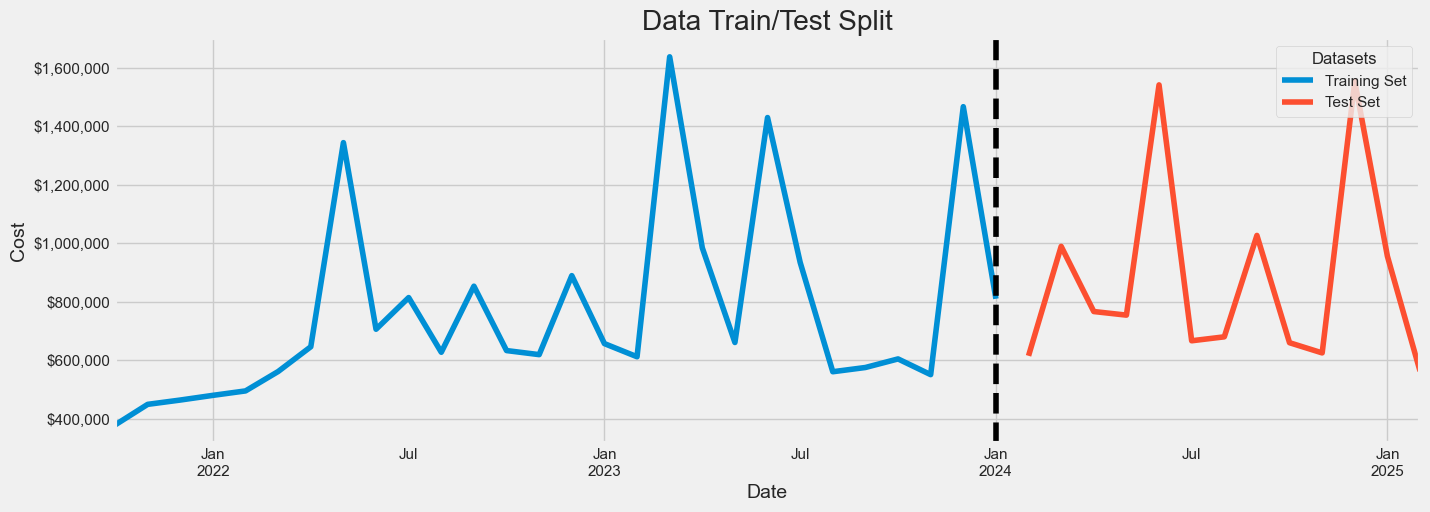

In [193]:
import matplotlib.pyplot as plt
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label = 'Test Set')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.axvline('01-01-2024', color='black', ls='--')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.legend(['Training Set', 'Test Set'], loc='upper right', title='Datasets')

<Axes: xlabel='Date'>

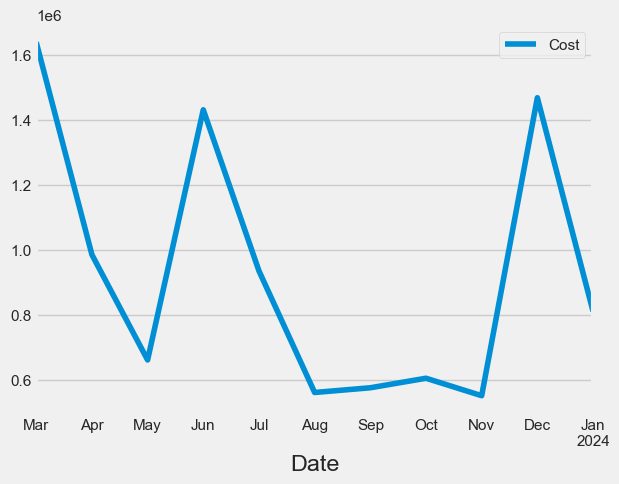

In [195]:
df_ml.loc[(df_ml.index > '02-01-2023') & (df_ml.index < '02-01-2024')].plot()

# Feature Creation 

In [196]:
def create_features(df):
    '''
    Create time series features based on time series index
    '''
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.day_of_week
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['1_month_lag'] = df['Cost'].shift(1)
    df['2_month_lag'] = df['Cost'].shift(2)
    df['3_month_lag'] = df['Cost'].shift(3)
    #df['6_month_lag'] = df['Cost'].shift(6)
    #df['12_month_lag'] = df['Cost'].shift(12)
    #df['24_month_lag'] = df['Cost'].shift(24)
    #df['6_month_mean'] = df['Cost'].rolling(window = 6).mean()
    #df['12_month_mean'] = df['Cost'].rolling(window = 12).mean()
    #df['24_month_mean'] = df['Cost'].rolling(window = 24).mean()
    #df['6_month_std'] = df['Cost'].rolling(window = 6).std()
    #df['12_month_std'] = df['Cost'].rolling(window = 12).std()
    #df['24_month_std'] = df['Cost'].rolling(window = 24).std()
    #df['6_month_max'] = df['Cost'].rolling(window = 6).max()
    #df['12_month_max'] = df['Cost'].rolling(window = 12).max()
    #df['24_month_max'] = df['Cost'].rolling(window = 24).max()
    #df['6_month_min'] = df['Cost'].rolling(window = 6).min()
    #df['12_month_min'] = df['Cost'].rolling(window = 12).min()
    #df['24_month_min'] = df['Cost'].rolling(window = 24).min()
    return df




In [197]:
df_ml = create_features(df_ml)

In [198]:
df_ml.sample(10)

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2023-05-01,661406.915024,0,0,5,2023,2,9.849516e+05,1.637978e+06,6.126164e+05
2022-08-01,628009.118636,0,0,8,2022,3,8.148950e+05,7.066702e+05,1.344622e+06
2023-07-01,935199.450999,0,5,7,2023,3,1.430313e+06,6.614069e+05,9.849516e+05
2023-10-01,605203.319905,0,6,10,2023,4,5.759178e+05,5.614320e+05,9.351995e+05
2022-04-01,646850.021354,0,4,4,2022,2,5.622309e+05,4.958688e+05,4.806844e+05
2025-02-01,563596.494212,0,5,2,2025,1,9.560546e+05,1.554002e+06,6.257406e+05
2021-12-01,464683.130717,0,2,12,2021,4,4.499119e+05,3.794357e+05,NaN
2022-01-01,480684.441351,0,5,1,2022,1,4.646831e+05,4.499119e+05,3.794357e+05
2023-09-01,575917.792403,0,4,9,2023,3,5.614320e+05,9.351995e+05,1.430313e+06


# Visualize our Feature / Target Relationship 

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/3667831974.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


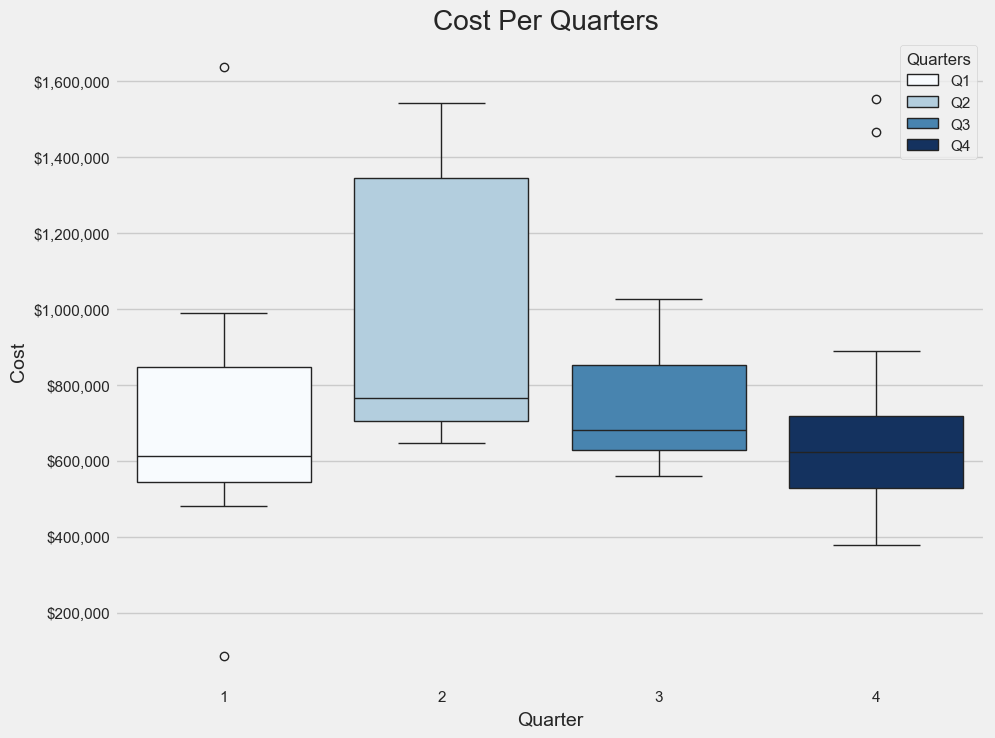

In [199]:
fix, ax = plt.subplots(figsize=(10,8))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
sns.boxplot(data=df_ml, x='quarter', y='Cost', palette='Blues', hue='quarter')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Cost Per Quarters ')
ax.legend(['Q1', 'Q2', 'Q3', 'Q4'], loc='upper right', title='Quarters')
ax.set_xlabel("Quarter", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

# Create our Model

In [200]:
train = create_features(train)
test = create_features(test)


In [201]:
train.columns

Index(['Cost', 'hour', 'day_of_week', 'month', 'year', 'quarter',
       '1_month_lag', '2_month_lag', '3_month_lag'],
      dtype='object')

In [202]:
FEATURES = train.columns[1:]
TARGET = train.columns[0]

In [203]:
FEATURES

Index(['hour', 'day_of_week', 'month', 'year', 'quarter', '1_month_lag',
       '2_month_lag', '3_month_lag'],
      dtype='object')

In [204]:
TARGET

'Cost'

In [205]:
X_train = train[FEATURES]
y_train = train[TARGET]


In [206]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [2]:
# Initialize the XGBoost Regressor with desired parameters
# reg = xgb.XGBRegressor()
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=3,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=100,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        random_state=42)\n"

In [786]:
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=1000,
                        learning_rate=0.1,
                        max_depth=3,
                        early_stopping_rounds = 50,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=1000,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        early_stopping_rounds = 50,\n                        random_state=42)\n"

In [207]:
# regresion model
reg = XGBRegressor(n_estimators = 12000,
                   early_stopping_rounds = 40,
                   learning_rate=0.01,
                   max_depth=2,
                   random_state=42
                   )

#reg = xgb.XGBRegressor()

reg.fit(X_train, y_train,
        eval_set = [(X_train,y_train), (X_test, y_test)],
        verbose = 100)




[0]	validation_0-rmse:323116.08910	validation_1-rmse:337657.81729
[100]	validation_0-rmse:248992.49966	validation_1-rmse:305956.65158
[200]	validation_0-rmse:192708.73023	validation_1-rmse:271169.25590
[300]	validation_0-rmse:158460.38408	validation_1-rmse:246795.14817
[400]	validation_0-rmse:132532.00491	validation_1-rmse:225878.42697
[500]	validation_0-rmse:110719.26277	validation_1-rmse:207290.47652
[600]	validation_0-rmse:94255.27531	validation_1-rmse:193870.77061
[700]	validation_0-rmse:80473.34971	validation_1-rmse:184700.98942
[800]	validation_0-rmse:69040.51748	validation_1-rmse:178647.90924
[900]	validation_0-rmse:58614.45866	validation_1-rmse:174924.61772
[1000]	validation_0-rmse:50308.72233	validation_1-rmse:171921.50498
[1075]	validation_0-rmse:44675.36567	validation_1-rmse:171756.00641


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=40,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Feature Importance

In [208]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
fi


,importance
hour,0.000000
day_of_week,0.115765
month,0.199580
year,0.109578
quarter,0.000000
1_month_lag,0.107883
2_month_lag,0.281451
3_month_lag,0.185743


<Axes: title={'center': 'Feature Importance'}>

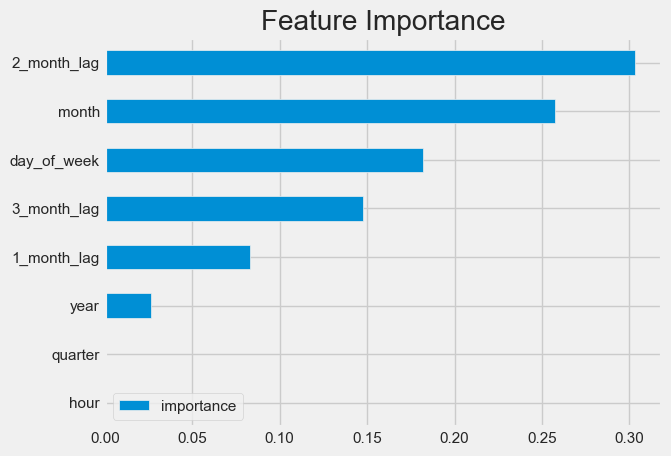

In [108]:
fi.sort_values('importance').plot(kind='barh', title="Feature Importance")

# Forecast on the Test

In [209]:
reg.predict(X_test)

array([ 591520.9 , 1010033.9 ,  883823.1 ,  752892.94, 1288536.  ,
        826207.9 ,  771016.5 ,  798116.1 ,  548532.06,  718470.3 ,
       1179506.4 ,  756830.5 ,  690347.56], dtype=float32)

In [210]:
test['predictions'] = reg.predict(X_test)
test

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2024-02-01,6.158228e+05,0,3,2,2024,1,NaN,NaN,NaN,5.915209e+05
2024-03-01,9.899129e+05,0,4,3,2024,1,6.158228e+05,NaN,NaN,1.010034e+06
2024-04-01,7.672112e+05,0,0,4,2024,2,9.899129e+05,6.158228e+05,NaN,8.838231e+05
2024-05-01,7.549222e+05,0,2,5,2024,2,7.672112e+05,9.899129e+05,6.158228e+05,7.528929e+05
2024-06-01,1.542014e+06,0,5,6,2024,2,7.549222e+05,7.672112e+05,9.899129e+05,1.288536e+06
2024-07-01,6.672585e+05,0,0,7,2024,3,1.542014e+06,7.549222e+05,7.672112e+05,8.262079e+05
2024-08-01,6.807256e+05,0,3,8,2024,3,6.672585e+05,1.542014e+06,7.549222e+05,7.710165e+05
2024-09-01,1.027315e+06,0,6,9,2024,3,6.807256e+05,6.672585e+05,1.542014e+06,7.981161e+05
2024-10-01,6.605933e+05,0,1,10,2024,4,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05


In [211]:
df_ml1 = df_ml.merge(test[['predictions']], how='left', left_index=True, right_index=True)
df_ml1

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2021-10-01,3.794357e+05,0,4,10,2021,4,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,0,0,11,2021,4,3.794357e+05,NaN,NaN,NaN
2021-12-01,4.646831e+05,0,2,12,2021,4,4.499119e+05,3.794357e+05,NaN,NaN
2022-01-01,4.806844e+05,0,5,1,2022,1,4.646831e+05,4.499119e+05,3.794357e+05,NaN
2022-02-01,4.958688e+05,0,1,2,2022,1,4.806844e+05,4.646831e+05,4.499119e+05,NaN
2022-03-01,5.622309e+05,0,1,3,2022,1,4.958688e+05,4.806844e+05,4.646831e+05,NaN
2022-04-01,6.468500e+05,0,4,4,2022,2,5.622309e+05,4.958688e+05,4.806844e+05,NaN
2022-05-01,1.344622e+06,0,6,5,2022,2,6.468500e+05,5.622309e+05,4.958688e+05,NaN
2022-06-01,7.066702e+05,0,2,6,2022,2,1.344622e+06,6.468500e+05,5.622309e+05,NaN


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/643989966.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


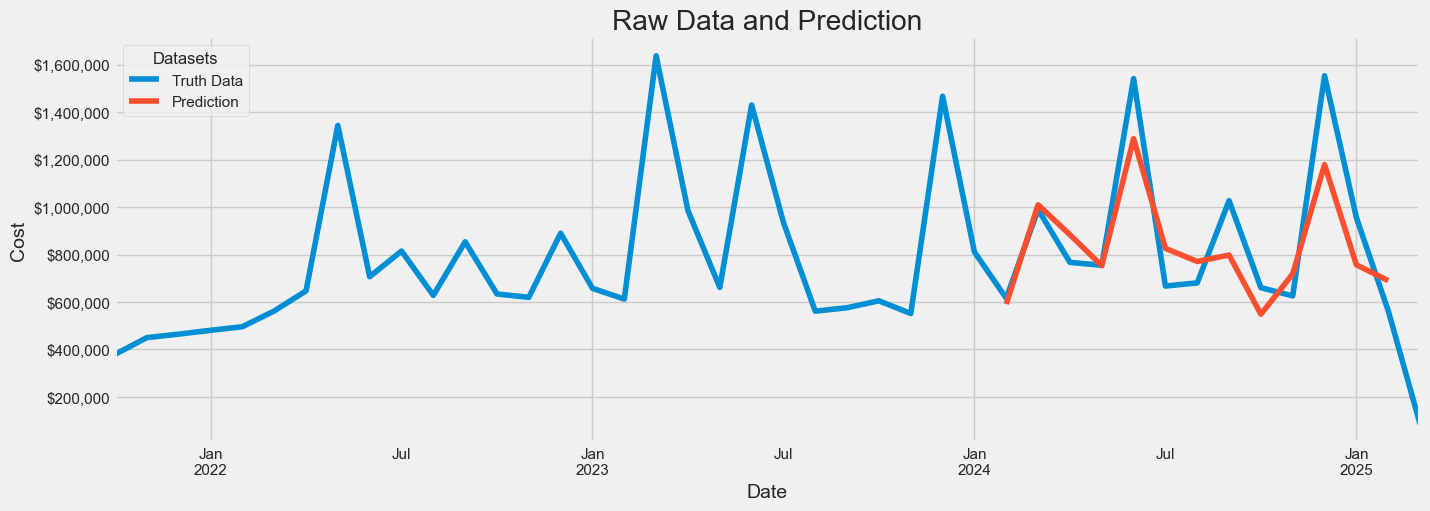

In [212]:
ax = df_ml1[['Cost']].plot(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
df_ml1['predictions'].plot(ax=ax, style='-')
ax.set_title('Raw Data and Prediction')
ax.legend(['Truth Data', 'Prediction'], loc='upper left', title='Datasets')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

In [213]:
score = np.sqrt(mean_squared_error(test['Cost'], test['predictions']))
print(f'RMSE Score on Test Set: {score:,.2f}')
num = "{:,.2f}".format(score)
print('RMSE Score on Test Set:', num)

RMSE Score on Test Set: 171,409.91
RMSE Score on Test Set: 171,409.91


In [214]:
reg.save_model("AWS_xgboost_model.json")  # Save the Model

# Calculate Error

- look at best and wost predicted months

In [215]:
test['error'] = np.abs(test['Cost'] - test['predictions'])

In [ ]:
# tets['date_index'] = test.index.date

In [216]:
test.groupby('Date')['error'].mean().sort_values(ascending=False).head(5) # Worst 

Date
2024-12-01    374495.560316
2024-06-01    253477.753067
2024-09-01    229198.461506
2025-01-01    199224.132754
2024-07-01    158949.368662
Name: error, dtype: float64

In [217]:
test.groupby('Date')['error'].mean().sort_values(ascending=True).head(5) # Best

Date
2024-05-01     2029.242377
2024-03-01    20120.953384
2024-02-01    24301.932976
2024-08-01    90290.869030
2024-11-01    92729.696968
Name: error, dtype: float64

- Cross Validation 
- Hyper Parameter Tunning 

# Now Let's do Forcast Predictions

In [218]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.load_model("AWS_xgboost_model.json")  # Load trained mode
#model = reg

In [219]:
Cost = df_ml[-12:]['Cost'].values
Cost

array([ 767211.23927792,  754922.17987719, 1542013.75306699,
        667258.5063381 ,  680725.63096972, 1027314.58650558,
        660593.27243416,  625740.61553184, 1554001.93531605,
        956054.6327542 ,  563596.49421164,   85897.538372  ])

In [220]:
Date_str = df_ml[-12:].index.values + pd.to_timedelta(52, 'W')
Date_str

array(['2025-03-31T00:00:00.000000000', '2025-04-30T00:00:00.000000000',
       '2025-05-31T00:00:00.000000000', '2025-06-30T00:00:00.000000000',
       '2025-07-31T00:00:00.000000000', '2025-08-31T00:00:00.000000000',
       '2025-09-30T00:00:00.000000000', '2025-10-31T00:00:00.000000000',
       '2025-11-30T00:00:00.000000000', '2025-12-31T00:00:00.000000000',
       '2026-01-31T00:00:00.000000000', '2026-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [221]:
data = {'Date_str': Date_str,'Cost' : Cost}
df_now = pd.DataFrame(data)
df_now

,Date_str,Cost
0,2025-03-31,7.672112e+05
1,2025-04-30,7.549222e+05
2,2025-05-31,1.542014e+06
3,2025-06-30,6.672585e+05
4,2025-07-31,6.807256e+05
5,2025-08-31,1.027315e+06
6,2025-09-30,6.605933e+05
7,2025-10-31,6.257406e+05
8,2025-11-30,1.554002e+06
9,2025-12-31,9.560546e+05


In [222]:
df_now['Date'] = pd.to_datetime(df_now['Date_str'])
df_now.set_index('Date')
df_now.index = pd.to_datetime(df_now.index)
df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/2121192341.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})


In [223]:
df_now

,Cost
Date,
2025-03-31,7.672112e+05
2025-04-30,7.549222e+05
2025-05-31,1.542014e+06
2025-06-30,6.672585e+05
2025-07-31,6.807256e+05
2025-08-31,1.027315e+06
2025-09-30,6.605933e+05
2025-10-31,6.257406e+05
2025-11-30,1.554002e+06


In [224]:
df_now = create_features(df_now)


In [225]:
df_now

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2025-03-31,7.672112e+05,0,0,3,2025,1,NaN,NaN,NaN
2025-04-30,7.549222e+05,0,2,4,2025,2,7.672112e+05,NaN,NaN
2025-05-31,1.542014e+06,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN
2025-06-30,6.672585e+05,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05
2025-07-31,6.807256e+05,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05
2025-08-31,1.027315e+06,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06
2025-09-30,6.605933e+05,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05
2025-10-31,6.257406e+05,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05
2025-11-30,1.554002e+06,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06


In [226]:
df_now.drop('Cost', axis=1, inplace=True)


In [227]:
reg.predict(df_now)

array([ 625218.  ,  823475.06,  999377.3 ,  876229.5 ,  990872.  ,
        829591.56,  548532.06,  725419.5 ,  864235.3 ,  677033.94,
        690347.56, 1203018.4 ], dtype=float32)

In [228]:
df_now['predictions'] = reg.predict(df_now)

In [229]:
df_now

,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,
2025-03-31,0,0,3,2025,1,NaN,NaN,NaN,6.252180e+05
2025-04-30,0,2,4,2025,2,7.672112e+05,NaN,NaN,8.234751e+05
2025-05-31,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN,9.993773e+05
2025-06-30,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05,8.762295e+05
2025-07-31,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05,9.908720e+05
2025-08-31,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06,8.295916e+05
2025-09-30,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05
2025-10-31,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05,7.254195e+05
2025-11-30,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06,8.642353e+05


In [230]:
df_ml['Cost'].values[-13]

np.float64(989912.9216155177)

In [231]:
df_now

,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,
2025-03-31,0,0,3,2025,1,NaN,NaN,NaN,6.252180e+05
2025-04-30,0,2,4,2025,2,7.672112e+05,NaN,NaN,8.234751e+05
2025-05-31,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN,9.993773e+05
2025-06-30,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05,8.762295e+05
2025-07-31,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05,9.908720e+05
2025-08-31,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06,8.295916e+05
2025-09-30,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05
2025-10-31,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05,7.254195e+05
2025-11-30,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06,8.642353e+05


In [232]:
df1

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul,TESAdd,TESMul
Date,,,,,,,,,,,,,,
2021-10-01,3.794357e+05,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,3.794357e+05,3.794357e+05,4.152089e+05,4.396901e+05,4.130417e+05,4.681522e+05
2021-11-01,4.499119e+05,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,4.146738e+05,4.146738e+05,4.878894e+05,5.513167e+05,4.096124e+05,4.540767e+05
2021-12-01,4.646831e+05,552168.709709,-87485.578992,NaN,NaN,4.313436e+05,NaN,401725.085965,4.396785e+05,4.396785e+05,5.500546e+05,6.470891e+05,1.026767e+06,9.380600e+05
2022-01-01,4.806844e+05,579860.260418,-99175.819067,NaN,NaN,4.650931e+05,NaN,413872.679101,4.601814e+05,4.601814e+05,6.023672e+05,7.208999e+05,5.240646e+05,5.597719e+05
2022-02-01,4.958688e+05,607184.994881,-111316.220142,NaN,NaN,4.804121e+05,NaN,426487.463046,4.780251e+05,4.780251e+05,6.452901e+05,7.689814e+05,4.193876e+05,4.733981e+05
2022-03-01,5.622309e+05,633906.709496,-71675.784494,NaN,NaN,5.129280e+05,4.721358e+05,447371.072577,5.201280e+05,5.201280e+05,6.897974e+05,8.129761e+05,1.141859e+06,1.037280e+06
2022-04-01,6.468500e+05,659719.628021,-12869.606666,NaN,NaN,5.683166e+05,5.167049e+05,478060.141620,5.834890e+05,5.834890e+05,7.398824e+05,8.619437e+05,6.942436e+05,7.018944e+05
2022-05-01,1.344622e+06,684273.176850,660348.384011,NaN,NaN,8.512342e+05,6.658231e+05,611377.283042,9.640553e+05,9.640553e+05,9.175511e+05,1.179810e+06,8.813600e+05,9.163970e+05
2022-06-01,7.066702e+05,707208.738873,-538.564945,NaN,NaN,8.993806e+05,7.061543e+05,626037.727793,8.353627e+05,8.353627e+05,9.504700e+05,1.189297e+06,9.924513e+05,9.494429e+05


In [233]:
df_new = pd.DataFrame()

In [234]:
df1_date =  df1.index.values
df1_date = np.append(df1_date, df_now.index.values)

In [235]:
df1_cost = df1['Cost'].values
df1_cost = np.append(df1_cost, df_now['predictions'].values)

In [236]:
len(df1_date)

53

In [237]:
len(df1_cost)

53

In [238]:
df_new['Date'] = df1_date
df_new['Cost'] = df1_cost


In [239]:
df_new.set_index('Date')
df_new.index = pd.to_datetime(df_new.index)
df_new_1 = df_new.groupby(['Date']).agg(Cost=('Cost','sum'))

<Axes: xlabel='Date'>

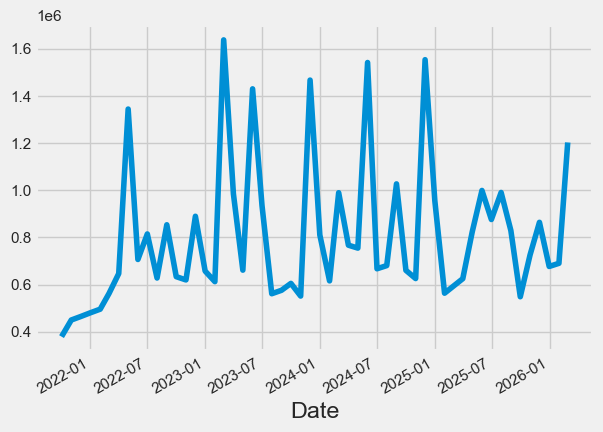

In [240]:
df_new_1['Cost'].plot()

In [241]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#get the values
cost_cycle, cost_trend = hpfilter(df_new_1['Cost'], lamb=1600) # 1600 for Quarterly data, 6.25  for yerly data and 129600 for monthly data

In [242]:
df_new_1['Trend'] = cost_trend

In [243]:
df_new_1

,Cost,Trend
Date,,
2021-10-01,3.794357e+05,495893.076201
2021-11-01,4.499119e+05,524005.576909
2021-12-01,4.646831e+05,552045.291743
2022-01-01,4.806844e+05,579893.126262
2022-02-01,4.958688e+05,607375.384678
2022-03-01,5.622309e+05,634256.365772
2022-04-01,6.468500e+05,660230.676694
2022-05-01,1.344622e+06,684947.908696
2022-06-01,7.066702e+05,708049.290117


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/2605701244.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


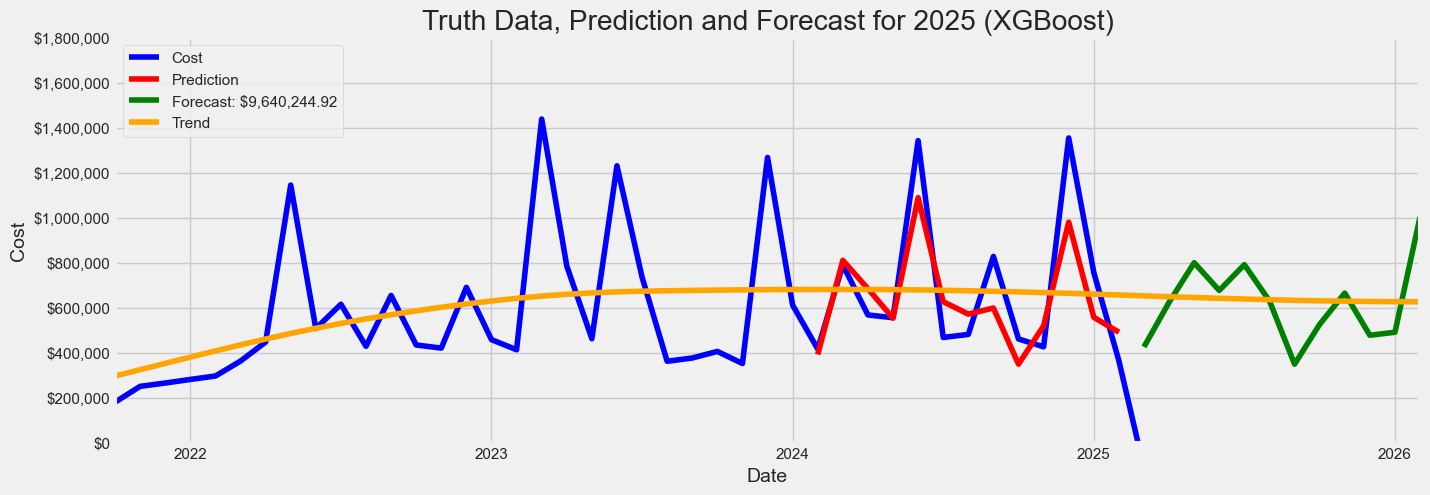

In [244]:
yhat = df_now['predictions'].values
#"{:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])

fig1, ax = plt.subplots(figsize=(15,5))
df_ml[['Cost']].plot(ax=ax, style='-', label= 'Truth Data', color='blue')
df_ml1['predictions'].plot(ax=ax, style='-', label= 'Prediction', color='red')
df_now['predictions'].plot(ax=ax, style='-', label= 'Forecast: '+str("${:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])), color='green')
#df1[['Trend']].plot(ax=ax).autoscale(axis='x', tight=True)
df_new_1[['Trend']].plot(ax=ax, label='Trend', color='orange')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data, Prediction and Forecast for 2025 (XGBoost)')
ax.legend(loc='upper left', title='')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

# Using Prophet

In [246]:
from prophet import Prophet

In [247]:
df_ml_p =combined_df.copy()
df_ml_p['Date_str'] = df_ml_p['Year'].apply(lambda x: str(x)) + "-" + df_ml_p['Month No'].apply(lambda x: str(x)) + "-01"
df_ml_p['ds'] = pd.to_datetime(df_ml_p['Date_str'])
#df_ml_p.set_index('ds')
#df_ml_p.index = pd.to_datetime(df_ml_p.index)
df_ml_p = df_ml_p.groupby(['ds']).agg(y=('Cost','sum'))

In [248]:
df_ml_p

,y
ds,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [249]:
df_p = pd.DataFrame()


In [250]:
df_p['ds'] = df_ml_p.index
df_p['y'] = df_ml_p['y'].values


In [251]:
# df_p = df_p.iloc[1:-1,:]
df_p

,ds,y
0,2021-10-01,3.794357e+05
1,2021-11-01,4.499119e+05
2,2021-12-01,4.646831e+05
3,2022-01-01,4.806844e+05
4,2022-02-01,4.958688e+05
5,2022-03-01,5.622309e+05
6,2022-04-01,6.468500e+05
7,2022-05-01,1.344622e+06
8,2022-06-01,7.066702e+05
9,2022-07-01,8.148950e+05


In [252]:
model = Prophet()
model.fit(df_p)

09:32:32 - cmdstanpy - INFO - Chain [1] start processing
09:32:32 - cmdstanpy - INFO - Chain [1] done processing


In [253]:
# Python
future = model.make_future_dataframe(periods=12, freq='M')   # Create a future DataFrame for 12 months
forecast = model.predict(future)                             # Generate the forecast
future.tail()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
49,2025-10-31
50,2025-11-30
51,2025-12-31
52,2026-01-31
53,2026-02-28


In [254]:
#forecast[['yhat', 'yhat_lower', 'yhat_upper']].sum()
#forecast[['yhat', 'yhat_lower', 'yhat_upper']]
yhat_low = forecast.iloc[-13:,:]['yhat_lower'].values
yhat = forecast.iloc[-13:,:]['yhat'].values
yhat_high = forecast.iloc[-13:,:]['yhat_upper'].values
#ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
print("{:,.2f}".format(yhat_low[0:-1].sum()) , "{:,.2f}".format(yhat[0:-1].sum()) , "{:,.2f}".format(yhat_high[0:-1].sum()))





6,906,298.40 10,745,205.41 14,551,219.91


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_67996/218562983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


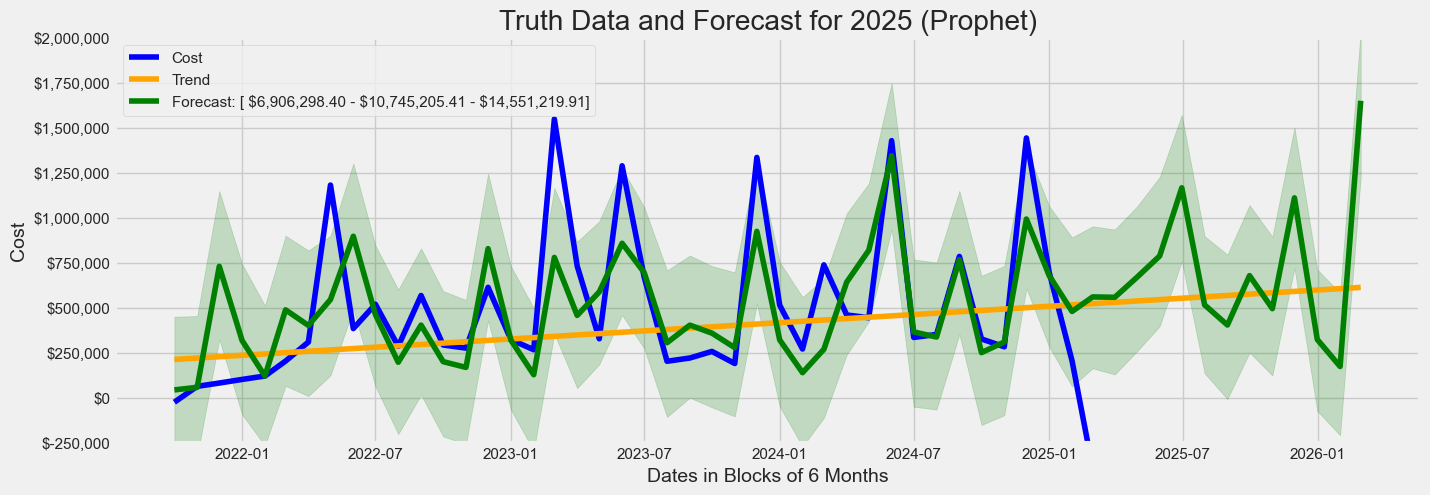

In [255]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

yhat = forecast.iloc[-13:,:]['yhat'].values
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df_p['ds'], df_p['y'], label='Cost',color='blue')
plt.plot(forecast['ds'], forecast['trend'], label='Trend',color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast: [ ' + str("${:,.2f}".format(yhat_low[0:-1].sum())) + " - " + str("${:,.2f}".format(yhat[0:-1].sum())) + 
                                                                      " - " + str("${:,.2f}".format(yhat_high[0:-1].sum()))+ ']',color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)
#plt.plot(forecast['ds'], forecast['yhat_lower'], label='Forecast',color='green', linestyle='--')
#plt.plot(forecast['ds'], forecast['yhat_upper'], label='Forecast',color='green', linestyle='--')
#model.plot(forecast, ax=ax)       # Plot the forecast
#plot(model, forecast)               # Plot the forecast
#plot_components(model, forecast)    # Plot the forecast components
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data and Forecast for 2025 (Prophet)')
#ax.legend(['Truth Data', 'Prediction','Forecast'], loc='upper left', title='Datesets')
ax.legend(loc='upper left', title='')
ax.set_xlabel("Dates in Blocks of 6 Months", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

In [207]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          53 non-null     datetime64[ns]
 1   trend                       53 non-null     float64       
 2   yhat_lower                  53 non-null     float64       
 3   yhat_upper                  53 non-null     float64       
 4   trend_lower                 53 non-null     float64       
 5   trend_upper                 53 non-null     float64       
 6   additive_terms              53 non-null     float64       
 7   additive_terms_lower        53 non-null     float64       
 8   additive_terms_upper        53 non-null     float64       
 9   yearly                      53 non-null     float64       
 10  yearly_lower                53 non-null     float64       
 11  yearly_upper                53 non-null     float64       
 

In [208]:
forecast['ds'].dt.month_name()
forecast['ds'].dt.year
forecast['ds'].dt.month


0     10
1     11
2     12
3      1
4      2
5      3
6      4
7      5
8      6
9      7
10     8
11     9
12    10
13    11
14    12
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    11
26    12
27     1
28     2
29     3
30     4
31     5
32     6
33     7
34     8
35     9
36    10
37    11
38    12
39     1
40     2
41     2
42     3
43     4
44     5
45     6
46     7
47     8
48     9
49    10
50    11
51    12
52     1
Name: ds, dtype: int32

In [209]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
48,2025-09-30,9.910841e+05,7.379119e+05,1.262062e+06
49,2025-10-31,8.594857e+05,5.643267e+05,1.136297e+06
50,2025-11-30,1.373464e+06,1.108857e+06,1.647056e+06
51,2025-12-31,7.673364e+05,5.004066e+05,1.056015e+06
52,2026-01-31,7.782516e+05,5.290054e+05,1.056837e+06


In [210]:
forecast.describe().T

,count,mean,min,25%,50%,75%,max,std
ds,53,2023-12-01 01:48:40.754716928,2021-10-01 00:00:00,2022-11-01 00:00:00,2023-12-01 00:00:00,2025-01-01 00:00:00,2026-01-31 00:00:00,NaN
trend,53.0,804230.783696,577229.901751,690863.056645,804209.140434,918129.128386,1031475.212198,134841.689353
yhat_lower,53.0,582142.341962,110988.610599,414872.35375,529005.360241,774500.159394,1241626.025639,274019.156099
yhat_upper,53.0,1127238.972762,658990.125626,960825.380887,1056015.32856,1314574.596593,1799132.194785,273603.379375
trend_lower,53.0,804230.780924,577229.901751,690863.056645,804209.140434,918129.128386,1031475.184208,134841.68515
trend_upper,53.0,804230.786512,577229.901751,690863.056645,804209.140434,918129.128386,1031475.240444,134841.693623
additive_terms,53.0,48563.98096,-255243.318076,-165173.85649,15178.174945,213098.466548,636943.820738,244183.134383
additive_terms_lower,53.0,48563.98096,-255243.318076,-165173.85649,15178.174945,213098.466548,636943.820738,244183.134383
additive_terms_upper,53.0,48563.98096,-255243.318076,-165173.85649,15178.174945,213098.466548,636943.820738,244183.134383
yearly,53.0,48563.98096,-255243.318076,-165173.85649,15178.174945,213098.466548,636943.820738,244183.134383


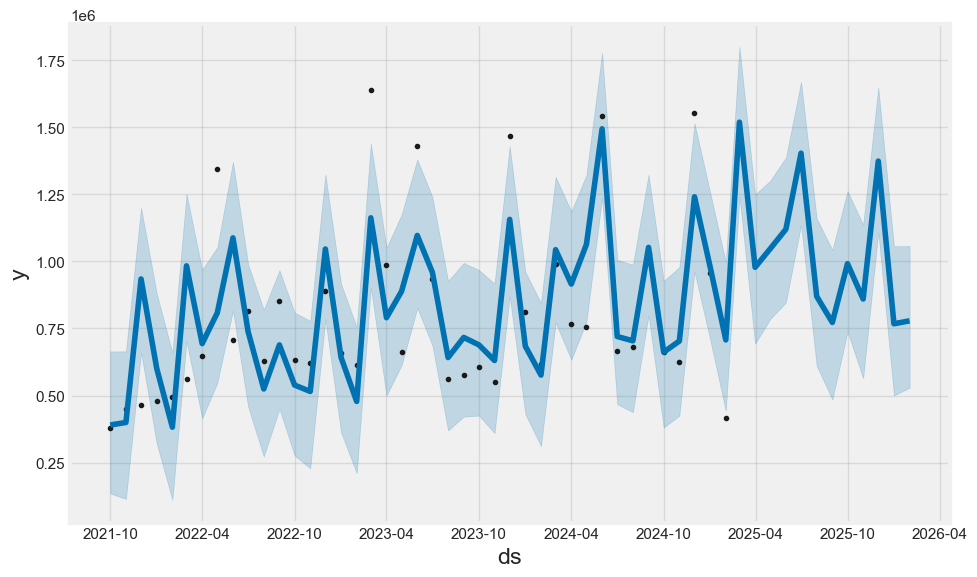

In [211]:
# Python
fig1 = model.plot(forecast)

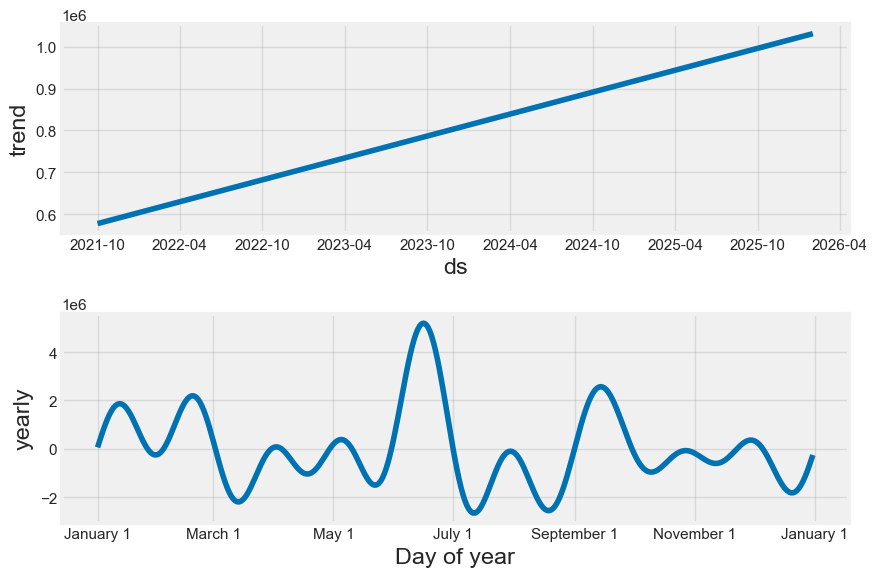

In [212]:
# Python
fig2 = model.plot_components(forecast)

# Using Deep Learning RNN

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [92]:
df_dl =combined_df.copy()
df_dl['Date_str'] = df_dl['Year'].apply(lambda x: str(x)) + "-" + df_dl['Month No'].apply(lambda x: str(x)) + "-01"
df_dl['Date'] = pd.to_datetime(df_dl['Date_str'])
#df_dl.set_index('Date')
#df_dl.index = pd.to_datetime(df_dl.index)
df_dl = df_dl.groupby(by=['Date']).agg(Cost=('Cost','sum'))

In [93]:
df_dl

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [94]:
dataset_temp = df_dl[['Cost']]

In [95]:
dataset_temp

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


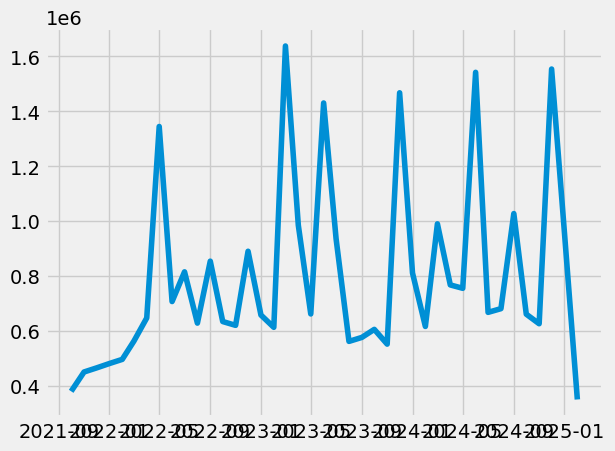

In [96]:
plt.plot(dataset_temp)
plt.show()

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:

# load the dataset
# dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')

In [99]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

27 14


In [100]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [109]:

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [110]:

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
12/12 - 0s - 28ms/step - loss: 1049581125632.0000
Epoch 2/200
12/12 - 0s - 2ms/step - loss: 974590509056.0000
Epoch 3/200
12/12 - 0s - 1ms/step - loss: 912007626752.0000
Epoch 4/200
12/12 - 0s - 1ms/step - loss: 847796568064.0000
Epoch 5/200
12/12 - 0s - 1ms/step - loss: 797833101312.0000
Epoch 6/200
12/12 - 0s - 1ms/step - loss: 748035506176.0000
Epoch 7/200
12/12 - 0s - 1ms/step - loss: 698657800192.0000
Epoch 8/200
12/12 - 0s - 1ms/step - loss: 656173891584.0000
Epoch 9/200
12/12 - 0s - 1ms/step - loss: 612665917440.0000
Epoch 10/200
12/12 - 0s - 1ms/step - loss: 572009676800.0000
Epoch 11/200
12/12 - 0s - 902us/step - loss: 534580920320.0000
Epoch 12/200
12/12 - 0s - 1ms/step - loss: 497837637632.0000
Epoch 13/200
12/12 - 0s - 960us/step - loss: 462801076224.0000
Epoch 14/200
12/12 - 0s - 1ms/step - loss: 431452979200.0000
Epoch 15/200
12/12 - 0s - 1ms/step - loss: 399334473728.0000
Epoch 16/200
12/12 - 0s - 1ms/step - loss: 369516740608.0000
Epoch 17/200
12/12 - 0s - 9

In [111]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 122321166336.00 MSE (349744.43 RMSE)
Test Score: 190304976896.00 MSE (436239.59 RMSE)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


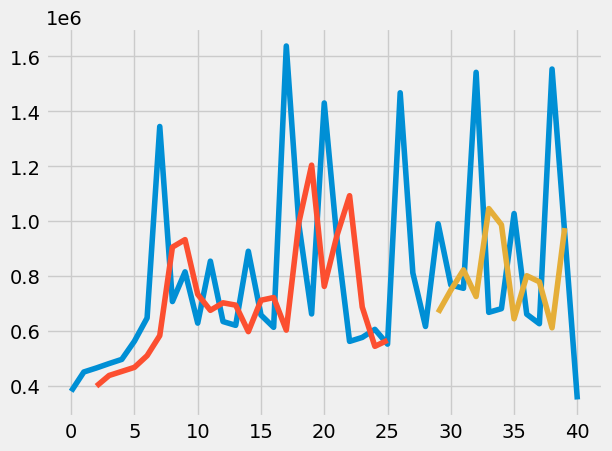

In [112]:
...
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/400
12/12 - 0s - 38ms/step - loss: 526040170496.0000
Epoch 2/400
12/12 - 0s - 1ms/step - loss: 489825763328.0000
Epoch 3/400
12/12 - 0s - 2ms/step - loss: 452050780160.0000
Epoch 4/400
12/12 - 0s - 1ms/step - loss: 414629888000.0000
Epoch 5/400
12/12 - 0s - 1ms/step - loss: 375282532352.0000
Epoch 6/400
12/12 - 0s - 1ms/step - loss: 337785815040.0000
Epoch 7/400
12/12 - 0s - 1ms/step - loss: 296300871680.0000
Epoch 8/400
12/12 - 0s - 976us/step - loss: 248333303808.0000
Epoch 9/400
12/12 - 0s - 1ms/step - loss: 204603326464.0000
Epoch 10/400
12/12 - 0s - 1ms/step - loss: 161354514432.0000
Epoch 11/400
12/12 - 0s - 1ms/step - loss: 134789808128.0000
Epoch 12/400
12/12 - 0s - 935us/step - loss: 118076506112.0000
Epoch 13/400
12/12 - 0s - 1ms/step - loss: 107734540288.0000
Epoch 14/400
12/12 - 0s - 999us/step - loss: 105101164544.0000
Epoch 15/400
12/12 - 0s - 1ms/step - loss: 102315212800.0000
Epoch 16/400
12/12 - 0s - 921us/step - loss: 102729424896.0000
Epoch 17/400
12/12 - 0s 

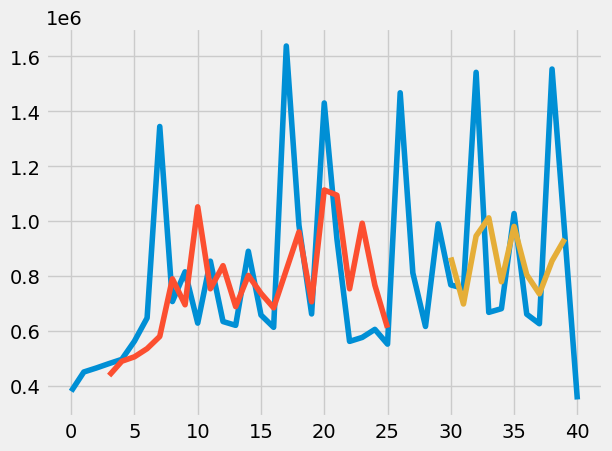

In [143]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_shape=(look_back,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Using ARIMA and LSTM

https://www.datacamp.com/tutorial/arima

https://neptune.ai/blog/arima-vs-prophet-vs-lstm



In [42]:
df_arima =combined_df.copy()
df_arima['Date_str'] = df_arima['Year'].apply(lambda x: str(x)) + "-" + df_arima['Month No'].apply(lambda x: str(x)) + "-01"
df_arima['Date'] = pd.to_datetime(df_arima['Date_str'])
df_arima.set_index('Date',inplace=True)
df_arima.index = pd.to_datetime(df_arima.index)
df_arima = df_arima.groupby(by=['Date']).agg(Cost=('Cost','sum'))
df_arima.sort_index(inplace=True)

In [43]:
df_arima

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

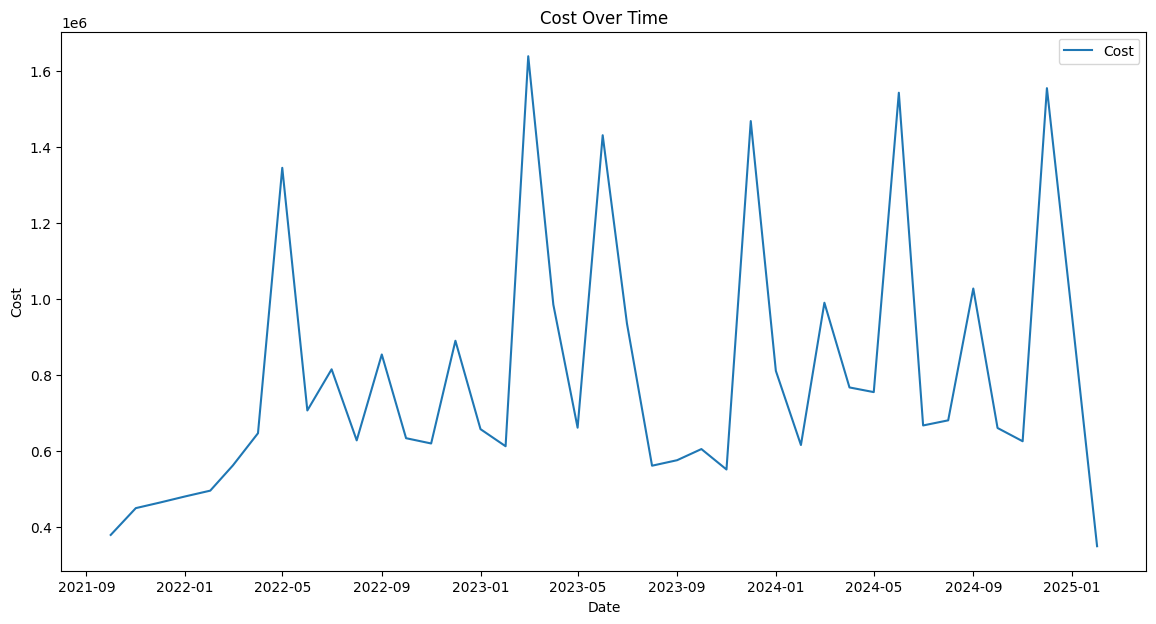

In [45]:
# Plotting the original Close price
plt.figure(figsize=(14, 7))
plt.plot(df_arima.index, df_arima["Cost"], label='Cost')
plt.title('Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [46]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(df_arima["Cost"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply first-order differencing
df_arima['Cost_Diff'] = df_arima["Cost"].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_arima['Cost_Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")


ADF Statistic (Original): -3.5551
p-value (Original): 0.0067
Interpretation: The original series is Stationary.

ADF Statistic (Differenced): -5.2199
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


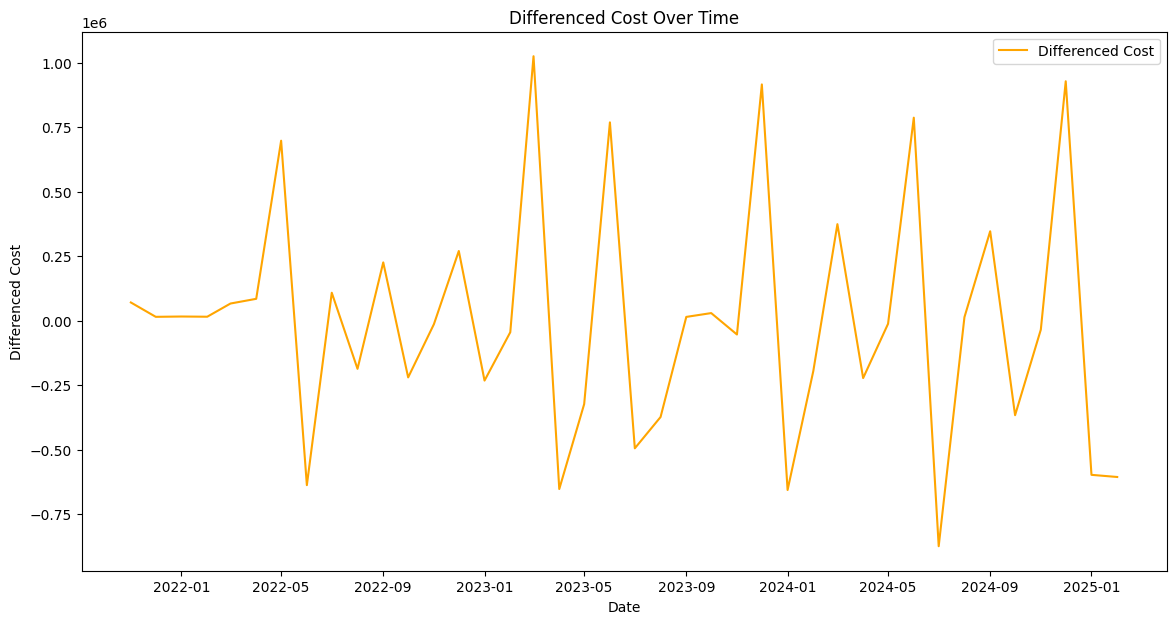

In [47]:
# Plotting the differenced Close price
plt.figure(figsize=(14, 7))
plt.plot(df_arima.index, df_arima['Cost_Diff'], label='Differenced Cost', color='orange')
plt.title('Differenced Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Cost')
plt.legend()
plt.show()

In [49]:
df_arima

,Cost,Cost_Diff
Date,,
2021-10-01,3.794357e+05,NaN
2021-11-01,4.499119e+05,7.047620e+04
2021-12-01,4.646831e+05,1.477126e+04
2022-01-01,4.806844e+05,1.600131e+04
2022-02-01,4.958688e+05,1.518433e+04
2022-03-01,5.622309e+05,6.636215e+04
2022-04-01,6.468500e+05,8.461910e+04
2022-05-01,1.344622e+06,6.977715e+05
2022-06-01,7.066702e+05,-6.379514e+05


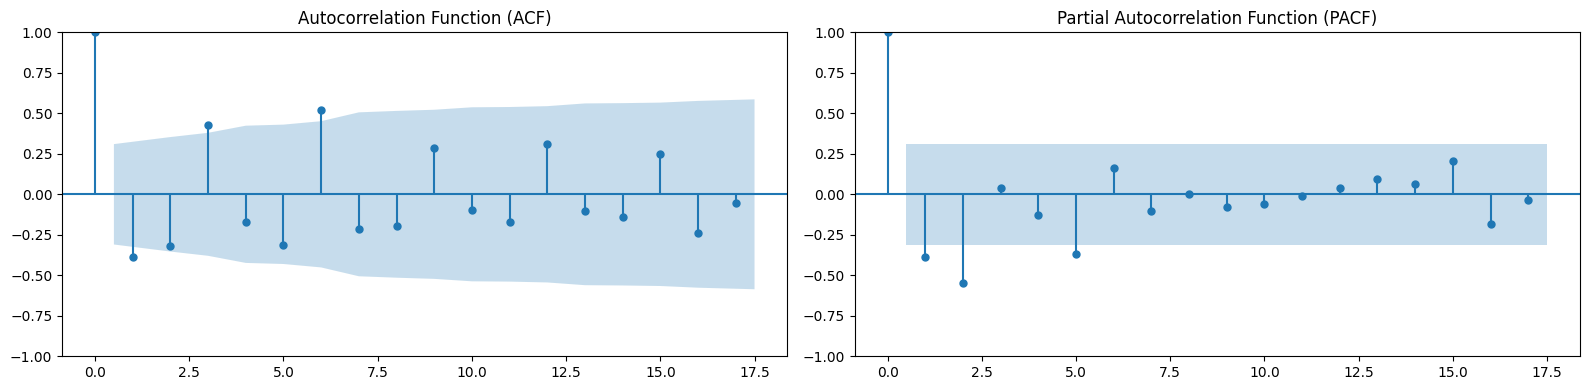

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
#plot_acf(df_arima['Cost_Diff'].dropna(), lags=40, ax=axes[0])
plot_acf(df_arima['Cost_Diff'].dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
#plot_pacf(df_arima['Cost_Diff'].dropna(), lags=40, ax=axes[1])
plot_pacf(df_arima['Cost_Diff'].dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [52]:
# Split data into train and test
train_size = int(len(df_arima) * 0.8)
train, test = df_arima.iloc[:train_size], df_arima.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["Cost"], order=(1,1,1))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


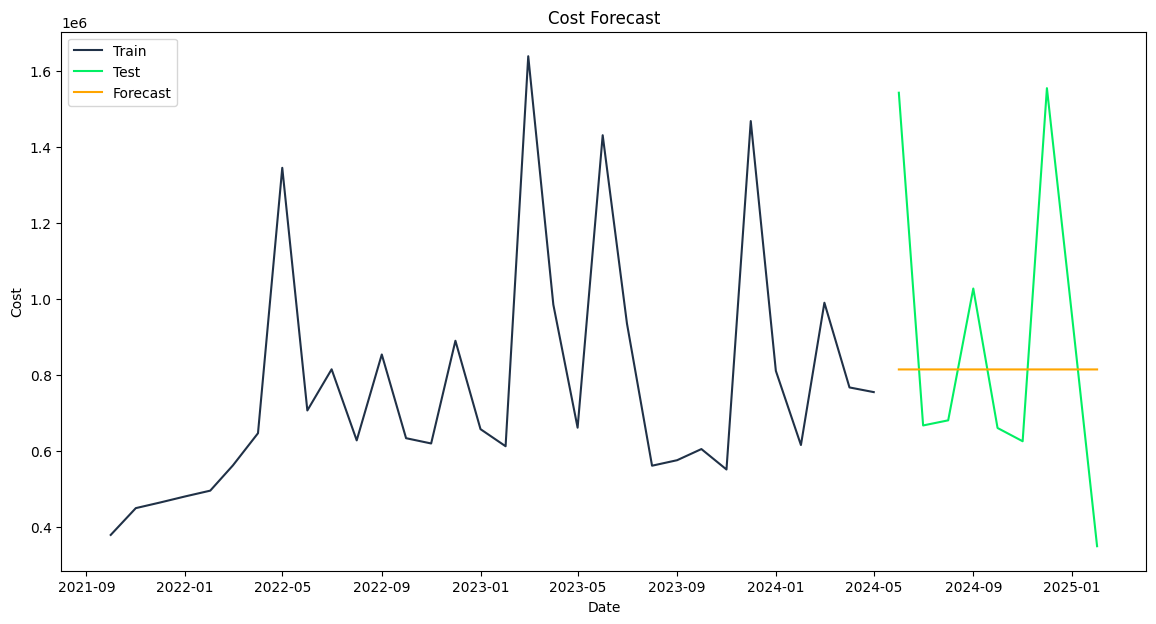

In [59]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Cost"], label='Train', color='#203147')
plt.plot(test.index, test["Cost"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Cost Forecast')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()


In [54]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 883.0276586955194
BIC: 887.3296203089749


In [55]:
forecast = forecast[:len(test)]
test_close = test["Cost"][:len(forecast)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_close, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 402260.1391


# finding new services in 2024

In [120]:
services_df = total_per_service_df[total_per_service_df['Total'] > 10]
x = services_df.sort_values(by=['Service','Year'])
x = x.reset_index()


In [121]:

total = 0
for index, row in x.iterrows():
    #print(row['Year'], row['Service'], row['Total'], index)
    #print(x.iloc[index,0])
    if row['Year'] == 2025:
        if index > 0 :
            #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
            #print(" * ",row['Year'], row['Service'], row['Total'], index)
            #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
            if x.iloc[index-1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)
                total = total + row['Total']
        else:
            if x.iloc[index+1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)  
                total = total + row['Total']        
print("Total $ in New Services ",total)



 *  2025 AWS Backup 177.0471520664 4
 *  2025 AWS Certificate Manager 1456.0 9
 *  2025 AWS CloudTrail 4267.7932087043 14
 *  2025 AWS Config 5597.39271 19
 *  2025 AWS Cost Explorer 40.7862 23
 *  2025 AWS Database Migration Service 2741.6741690379 30
 *  2025 AWS Directory Service 494.12366115 35
 *  2025 AWS Elemental MediaLive 27.0816 40
 *  2025 AWS Global Accelerator 33.8570972152 47
 *  2025 AWS Glue 14.4360912696 51
 *  2025 AWS Key Management Service 328.820238538 56
 *  2025 AWS Lambda 4082.2132638381 61
 *  2025 AWS Secrets Manager 212.0174806031 69
 *  2025 AWS Security Hub 710.1294109 74
 *  2025 AWS Support (Enterprise) 49246.7885 79
 *  2025 AWS Transfer Family 203.8023883235 84
 *  2025 AWS WAF 1581.0202725838 89
 *  2025 AWS X-Ray 47.56615955 94
 *  2025 Amazon API Gateway 97.2144196157 99
 *  2025 Amazon CloudFront 23456.071145917 106
 *  2025 Amazon Cognito 91.25025 111
 *  2025 Amazon Detective 307.2288293262 116
 *  2025 Amazon DocumentDB (with MongoDB compatibilit